In [1]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import certifi
import json

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.preprocessing import PolynomialFeatures

# time series
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# deep learning
import tensorflow as tf

import warnings 
warnings.simplefilter('ignore')
# Setting pandas options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns", None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


api key: 276254f42a8b61728c2b7cc4a0e6286f

# Style Settings




In [3]:
# graphic colors
cback1 = '#362B4E'
cfont1 = '#5D5F6A'
c1 = '#C4A980'
c2 = '#E6DA8B'
c3 = '#D18F6D'
c4 = '#6FA59D'
c5 = '#CEA346'
c6 = '#CB4D29'

# train, val, test indices</h2>


In [4]:
train_start_ind = 60
train_end_ind = 1000
# val_start_ind = 450
# val_end_ind = 800
test_start_ind = 1000
test_end_ind = 1200

# importing data</h2>


In [5]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)



# Import old data

In [6]:
df_old = pd.read_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/05. Deep Learning/04. stockmarket_timehyperfeature/21_12_01_upro_root.csv')

In [7]:
df_old.shape

(1258, 13)

In [8]:
df_old.tail()

date   open   high    low  close  adjClose      volume  \
1253  2021-11-23 145.66 147.43 143.10 146.70    146.70  6439011.00   
1254  2021-11-24 144.64 147.88 143.77 147.69    147.69  4829962.00   
1255  2021-11-26 141.04 142.48 136.76 138.07    138.07  8305318.00   
1256  2021-11-29 142.43 144.67 140.32 142.96    142.96  5832252.00   
1257  2021-11-30 140.49 142.33 134.31 134.85    134.85 10241135.00   

      unadjustedVolume  change  changePercent   vwap            label  \
1253        6439011.00    1.04           0.71 145.74  November 23, 21   
1254        4829962.00    3.05           2.11 146.45  November 24, 21   
1255        8305318.00   -2.97          -2.11 139.10  November 26, 21   
1256        5832252.00    0.53           0.37 142.65  November 29, 21   
1257       10241135.00   -5.64          -4.01 137.16  November 30, 21   

      changeOverTime  
1253            0.01  
1254            0.02  
1255           -0.02  
1256            0.00  
1257           -0.04

# Old new join

In [9]:
df = df_old.copy()

# Preprocessing

## day high low

In [10]:
df['day_low'] = df[['open', 'close', 'low']].min(axis=1)

In [11]:
df['14day_low'] = df['day_low'].rolling(14).min()

In [12]:
df['day_high'] = df[['open', 'close', 'high']].max(axis=1)

In [13]:
df['14day_high'] = df['day_high'].rolling(14).max()

## Engineering time features

## Engineering pct_change features

In [14]:
df['close_pct_change'] = df['close'].pct_change()

In [15]:
df[['close','close_pct_change']].head() 

close  close_pct_change
0  25.43               NaN
1  25.48              0.00
2  25.91              0.02
3  26.19              0.01
4  27.19              0.04

# Indicator Development

## Fast/Slow Stochastic

In [16]:
# K of fast
df['fast_k'] = (df['close'] - df['14day_low']) / \
                                        (df['14day_high'] - df['14day_low'] )

In [17]:
# D of fast
df['fast_d'] = df['fast_k'].rolling(3).mean()

In [18]:
# K of slow
df['slow_k'] = df['fast_d'].rolling(3).mean()

In [19]:
# D of slow
df['slow_d'] = df['slow_k'].rolling(3).mean()

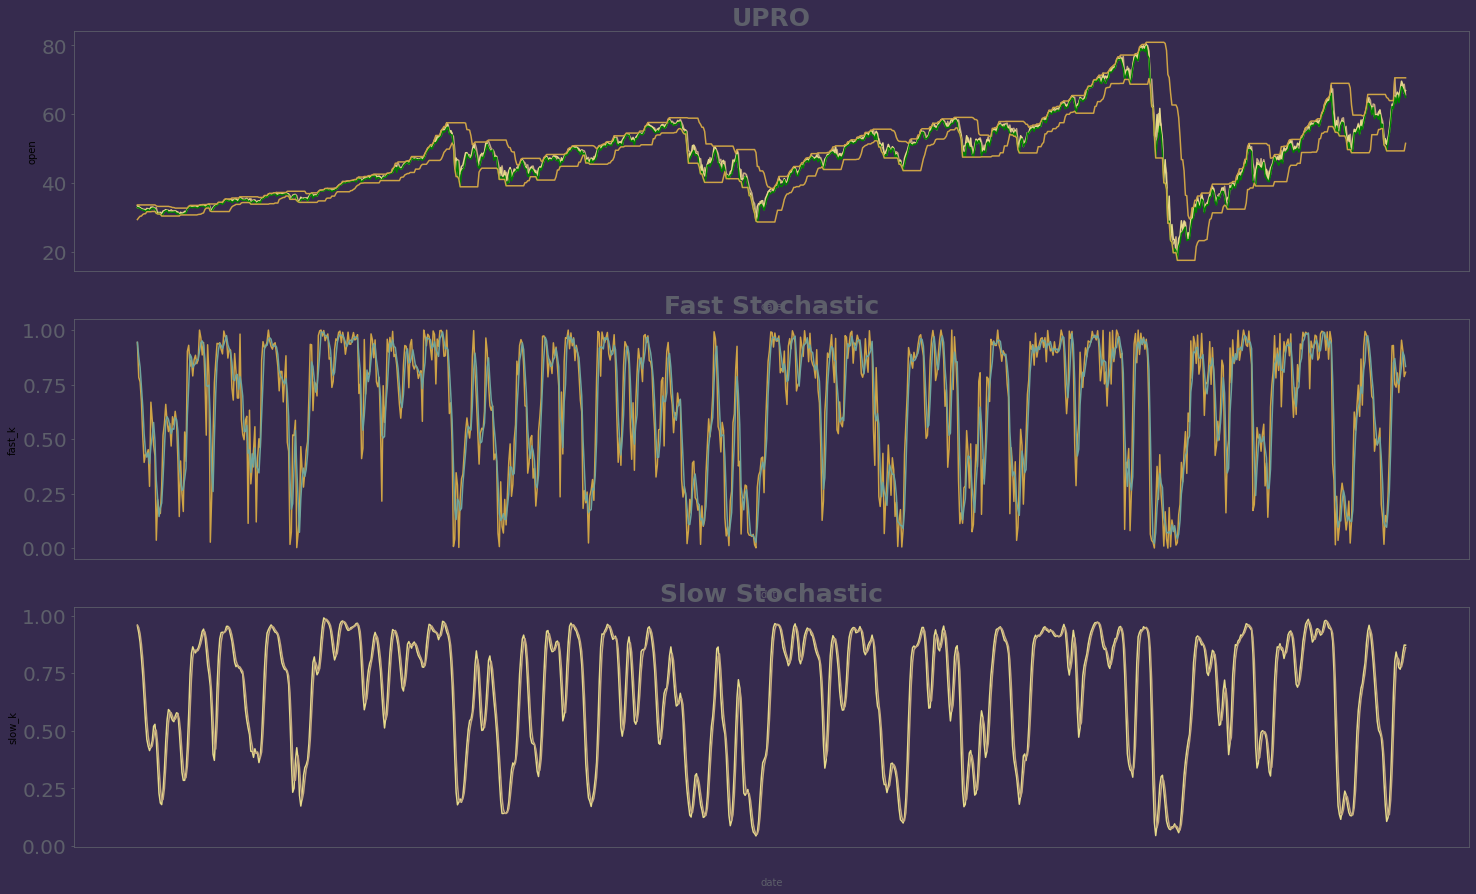

In [20]:
fig, ax = plt.subplots(3,1, figsize=(25,15))
fig.set_facecolor(cback1)
ax[0].set_title('UPRO', fontsize=25, fontweight='bold').set_color(cfont1)
# plt.xticks(rotation = 45, ax=ax[0])
ax[0].set_facecolor(cback1)
ax[0].spines['bottom'].set_color(cfont1)
ax[0].spines['top'].set_color(cfont1)
ax[0].spines['right'].set_color(cfont1)
ax[0].spines['left'].set_color(cfont1)
ax[0].xaxis.label.set_color(cfont1)
ax[0].tick_params(axis='x', colors=cback1, labelsize=20)
ax[0].tick_params(axis='y', colors=cfont1, labelsize=20)

sns.lineplot(data=df[train_start_ind:train_end_ind], 
             x = 'date',y = 'open',color=c1,ax=ax[0])
sns.lineplot(data=df[train_start_ind:train_end_ind], 
             x = 'date',y = 'close',color=c2,ax=ax[0])
sns.lineplot(data=df[train_start_ind:train_end_ind], 
             x = 'date',y = 'day_low',color='green',ax=ax[0])
sns.lineplot(data=df[train_start_ind:train_end_ind], 
             x = 'date',y = '14day_low',color=c5,ax=ax[0])
sns.lineplot(data=df[train_start_ind:train_end_ind], 
             x = 'date',y = '14day_high',color=c5,ax=ax[0])

ax[1].set_title('Fast Stochastic', fontsize=25, fontweight='bold').set_color(cfont1)
ax[1].set_facecolor(cback1)
ax[1].spines['bottom'].set_color(cfont1)
ax[1].spines['top'].set_color(cfont1)
ax[1].spines['right'].set_color(cfont1)
ax[1].spines['left'].set_color(cfont1)
ax[1].xaxis.label.set_color(cfont1)
ax[1].tick_params(axis='x', colors=cback1, labelsize=20)
ax[1].tick_params(axis='y', colors=cfont1, labelsize=20)

sns.lineplot(data=df[train_start_ind:train_end_ind],
           x='date',y='fast_k',color=c5,ax=ax[1])
sns.lineplot(data=df[train_start_ind:train_end_ind],
           x='date',y='fast_d',color=c4,ax=ax[1])

ax[2].set_title('Slow Stochastic', fontsize=25, fontweight='bold').set_color(cfont1)
ax[2].set_facecolor(cback1)
ax[2].spines['bottom'].set_color(cfont1)
ax[2].spines['top'].set_color(cfont1)
ax[2].spines['right'].set_color(cfont1)
ax[2].spines['left'].set_color(cfont1)
ax[2].xaxis.label.set_color(cfont1)

ax[2].tick_params(axis='x', colors=cback1, labelsize=20)
ax[2].tick_params(axis='y', colors=cfont1, labelsize=20)

sns.lineplot(data=df[train_start_ind:train_end_ind],
           x='date',y='slow_k',color=c2,ax=ax[2])
sns.lineplot(data=df[train_start_ind:train_end_ind],
           x='date',y='slow_d',color=c1,ax=ax[2])



## pct_change of fast_k

In [21]:
df['fast_k_pct_change'] = df['fast_k'].pct_change()

In [22]:
up_down = []

for direction in df['fast_k_pct_change']:
    if direction > 0:
        up_down.append('up')
    elif direction < 0:
        up_down.append('down')
    else:
        up_down.append('same')

In [23]:
df['up_down_fast_k'] = up_down

## Weekly fast_k

In [24]:
df['14week_high'] = df['day_high'].rolling(14*5).max()

In [25]:
df['14week_low'] = df['day_low'].rolling(14*5).min()

In [26]:
df['fast_k_weekly'] = (df['close'] - df['14week_high']) / \
                                        (df['14week_high'] - df['14week_low'] )

In [27]:
# D of fast
df['fast_d_weekly'] = df['fast_k_weekly'].rolling(3).mean()

## Weekly slow_k

In [28]:
# K of slow
df['slow_k_weekly'] = df['fast_d_weekly'].rolling(3).mean()

In [29]:
df['slow_d_weekly'] = df['slow_k_weekly'].rolling(3).mean()

## MACD

In [30]:
df['ema_12'] = df['close'].ewm(span=12).mean()
df['ema_26'] = df['close'].ewm(span=26).mean()

In [31]:
df['MACD'] = df['ema_12'] - df['ema_26']

In [32]:
df['slow_MACD'] = df['MACD'].ewm(span=9).mean()

In [33]:
df['diff_MACD'] = df['MACD'] - df['slow_MACD']

In [34]:
df.head(10)

date  open  high   low  close  adjClose      volume  \
0  2016-12-01 25.85 25.85 25.30  25.43     25.09  6401400.00   
1  2016-12-02 25.48 25.68 25.34  25.48     25.13  4539600.00   
2  2016-12-05 25.82 26.08 25.74  25.91     25.56  6134100.00   
3  2016-12-06 26.02 26.20 25.82  26.19     25.84  5413200.00   
4  2016-12-07 26.13 27.24 26.07  27.19     26.83  9288600.00   
5  2016-12-08 27.20 27.61 27.09  27.40     27.03  6087900.00   
6  2016-12-09 27.51 27.90 27.49  27.89     27.51  6509400.00   
7  2016-12-12 27.87 28.07 27.63  27.81     27.44  5651400.00   
8  2016-12-13 28.09 28.58 28.08  28.34     27.96  7431900.00   
9  2016-12-14 28.23 28.55 27.47  27.70     27.32 10594200.00   

   unadjustedVolume  change  changePercent  vwap            label  \
0        6401400.00   -0.42          -1.61 25.53  December 01, 16   
1        4539600.00   -0.00          -0.01 25.50  December 02, 16   
2        6134100.00    0.09           0.35 25.91  December 05, 16   
3        5413200.00    0.17           0.67 26.07  December 06, 16   
4        9288600.00    1.07           4.08 26.83  December 07, 16   
5        6087900.00    0.20           0.75 27.37  December 08, 16   
6        6509400.00    0.38           1.37 27.76  December 09, 16   
7        5651400.00   -0.06          -0.21 27.84  December 12, 16   
8        7431900.00    0.25           0.90 28.33  December 13, 16   
9       10594200.00   -0.53          -1.89 27.91  December 14, 16   

   changeOverTime  day_low  14day_low  day_high  14day_high  close_pct_change  \
0           -0.02    25.30        NaN     25.85         NaN               NaN   
1           -0.00    25.34        NaN     25.68         NaN              0.00   
2            0.00    25.74        NaN     26.08         NaN              0.02   
3            0.01    25.82        NaN     26.20         NaN              0.01   
4            0.04    26.07        NaN     27.24         NaN              0.04   
5            0.01    27.09        NaN     27.61         NaN              0.01   
6            0.01    27.49        NaN     27.90         NaN              0.02   
7           -0.00    27.63        NaN     28.07         NaN             -0.00   
8            0.01    28.08        NaN     28.58         NaN              0.02   
9           -0.02    27.47        NaN     28.55         NaN             -0.02   

   fast_k  fast_d  slow_k  slow_d  fast_k_pct_change up_down_fast_k  \
0     NaN     NaN     NaN     NaN                NaN           same   
1     NaN     NaN     NaN     NaN                NaN           same   
2     NaN     NaN     NaN     NaN                NaN           same   
3     NaN     NaN     NaN     NaN                NaN           same   
4     NaN     NaN     NaN     NaN                NaN           same   
5     NaN     NaN     NaN     NaN                NaN           same   
6     NaN     NaN     NaN     NaN                NaN           same   
7     NaN     NaN     NaN     NaN                NaN           same   
8     NaN     NaN     NaN     NaN                NaN           same   
9     NaN     NaN     NaN     NaN                NaN           same   

   14week_high  14week_low  fast_k_weekly  fast_d_weekly  slow_k_weekly  \
0          NaN         NaN            NaN            NaN            NaN   
1          NaN         NaN            NaN            NaN            NaN   
2          NaN         NaN            NaN            NaN            NaN   
3          NaN         NaN            NaN            NaN            NaN   
4          NaN         NaN            NaN            NaN            NaN   
5          NaN         NaN            NaN            NaN            NaN   
6          NaN         NaN            NaN            NaN            NaN   
7          NaN         NaN            NaN            NaN            NaN   
8          NaN         NaN            NaN            NaN            NaN   
9          NaN         NaN            NaN            NaN            NaN   

   slow_d_weekly  ema_12  ema_26  MACD  slow

## Weekly MACD

In [35]:
df['ema_12_weekly'] = df['close'].ewm(span=12*5).mean()
df['ema_26_weekly'] = df['close'].ewm(span=26*5).mean()

In [36]:
df['MACD_weekly'] = df['ema_12_weekly'] - df['ema_26_weekly']

In [37]:
df['slow_MACD_weekly'] = df['MACD_weekly'].ewm(span=9).mean()

In [38]:
df['diff_MACD_weekly'] = df['MACD_weekly'] - df['slow_MACD_weekly']

## RSI

In [39]:
change = df['close'].diff(1)
df['Gain'] = change.mask(change<0,0)
df['Loss'] = abs(change.mask(change>0,0))
df['AVG_Gain'] = df.Gain.rolling(14).mean()
df['AVG_Loss'] = df.Loss.rolling(14).mean()
df['RS'] = df['AVG_Gain']/df['AVG_Loss']
df['rsi'] = 100 - (100/(1+df['RS']))

In [40]:
df['rsi']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1253   57.92
1254   55.78
1255   32.87
1256   42.58
1257   35.11
Name: rsi, Length: 1258, dtype: float64

## Volume

In [41]:
df['vol_12'] = df['volume'].ewm(span=12).mean()
df['vol_26'] = df['volume'].ewm(span=26).mean()

In [42]:
df['fast_vol_macd'] = df['vol_12'] - df['vol_26']

In [43]:
df['slow_vol_macd'] = df['fast_vol_macd'].ewm(span=9).mean()

In [44]:
df['macd_vol'] = df['fast_vol_macd'] - df['slow_vol_macd']

## MassIndex

In [45]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjClose', 'volume',
       'unadjustedVolume', 'change', 'changePercent', 'vwap', 'label',
       'changeOverTime', 'day_low', '14day_low', 'day_high', '14day_high',
       'close_pct_change', 'fast_k', 'fast_d', 'slow_k', 'slow_d',
       'fast_k_pct_change', 'up_down_fast_k', '14week_high', '14week_low',
       'fast_k_weekly', 'fast_d_weekly', 'slow_k_weekly', 'slow_d_weekly',
       'ema_12', 'ema_26', 'MACD', 'slow_MACD', 'diff_MACD', 'ema_12_weekly',
       'ema_26_weekly', 'MACD_weekly', 'slow_MACD_weekly', 'diff_MACD_weekly',
       'Gain', 'Loss', 'AVG_Gain', 'AVG_Loss', 'RS', 'rsi', 'vol_12', 'vol_26',
       'fast_vol_macd', 'slow_vol_macd', 'macd_vol'],
      dtype='object')

In [46]:
df['ema9_hl'] = (df['high'] - df['low']).ewm(span=9).mean()

In [47]:
df['ema9_9_hl'] = df['ema9_hl'].ewm(span=9).mean()

In [48]:
df['massind'] = (df['ema9_hl']/df['ema9_9_hl']).rolling(25).sum()

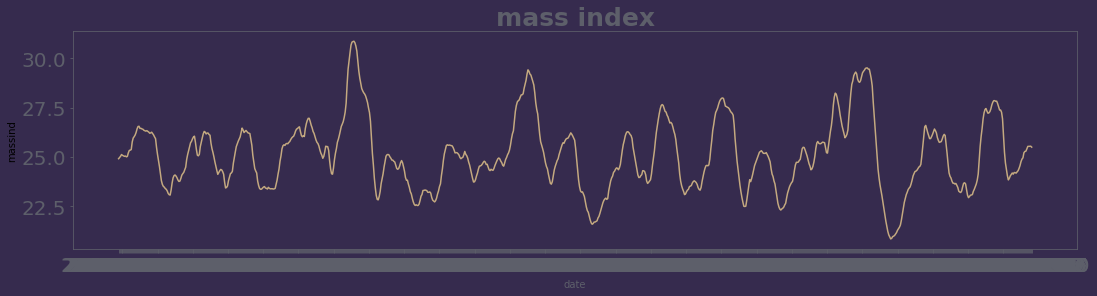

In [49]:
fig, ax = plt.subplots(1,1, figsize=(18,4))
fig.set_facecolor(cback1)
ax.set_title('mass index', fontsize=25, fontweight='bold').set_color(cfont1)
# plt.xticks(rotation = 45, ax=ax[0])
ax.set_facecolor(cback1)
ax.spines['bottom'].set_color(cfont1)
ax.spines['top'].set_color(cfont1)
ax.spines['right'].set_color(cfont1)
ax.spines['left'].set_color(cfont1)
ax.xaxis.label.set_color(cfont1)
ax.tick_params(axis='x', colors=cfont1, labelsize=20)
ax.tick_params(axis='y', colors=cfont1, labelsize=20)

sns.lineplot(data=df[train_start_ind:train_end_ind], 
             x = 'date',y = 'massind',color=c1)

## Money Flow Index

In [50]:
df['typicalprice'] = (df['high'] + df['low'] + df['close']) / 3

In [51]:
df['rawmoneyflow'] = df['typicalprice'] + df['volume']

In [52]:
change = df['rawmoneyflow'].diff(1)
df['Gainmf'] = change.mask(change>0,0)
df['Lossmf'] = abs(change.mask(change<0,0))
df['AVG_Gainmf'] = df.Gain.rolling(14).sum()
df['AVG_Lossmf'] = df.Loss.rolling(14).sum()
df['moneyratio'] = df['AVG_Gainmf']/df['AVG_Lossmf']
df['mf_index'] = 100 - (100/(1+df['moneyratio']))

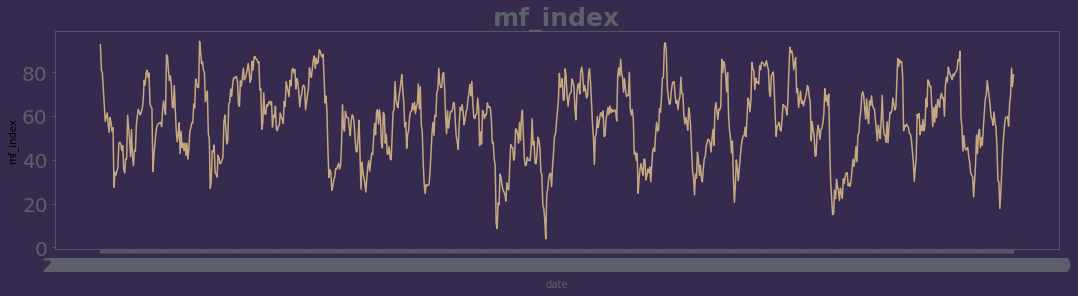

In [53]:
fig, ax = plt.subplots(1,1, figsize=(18,4))
fig.set_facecolor(cback1)
ax.set_title('mf_index', fontsize=25, fontweight='bold').set_color(cfont1)
# plt.xticks(rotation = 45, ax=ax[0])
ax.set_facecolor(cback1)
ax.spines['bottom'].set_color(cfont1)
ax.spines['top'].set_color(cfont1)
ax.spines['right'].set_color(cfont1)
ax.spines['left'].set_color(cfont1)
ax.xaxis.label.set_color(cfont1)
ax.tick_params(axis='x', colors=cfont1, labelsize=20)
ax.tick_params(axis='y', colors=cfont1, labelsize=20)

sns.lineplot(data=df[train_start_ind:train_end_ind], 
             x = 'date',y = 'mf_index',color=c1)

# Engineering time features



In [59]:
# business days in the past
periods_fast_k = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
periods_fast_d = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
periods_slow_k = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
periods_pct_change = [1,2,4,5,6,9,10,11,14,15,16,19,30,31,34,35,36,39,40,41,44,45,46,49,50,51,54,55,56,59,60]
periods_macd_diff = [1,4,5,6,9,10,11,14,15,16,19,30,31,34,35,36,39,40,41,44,45,46,49,50,51,54,55,56,59,60]
periods_rsi = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
periods_ema_12 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
periods_ema_26 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
periods_fast_k_weekly = [1,6,11,16,18,21,26,31,36,41,46,51,56]
periods_fast_d_weekly = [1,6,11,16,18,21,26,31,36,41,46,51,56]
periods_macd_diff_weekly = [1,6,11,16,18,21,26,31,36,41,46,51,56]
periods_macd_vol = [1,4,5,6,9,10,11,14,15,16,19,30,31,34,35,36,39,40,41,44,45,46,49,50,51,54,55,56,59,60]
periods_massind = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
periods_mf_index = [1,4,5,6,9,10,11,14,15,16,19,30,31,34,35,36,39,40,41,44,45,46,49,50,51,54,55,56,59,60]
periods_fast_k_tomorrow = [-1]
features_time = [('fast_k', periods_fast_k), ('fast_d', periods_fast_d), ('slow_k',periods_slow_k),
                 ('close_pct_change', periods_pct_change),('diff_MACD',periods_macd_diff), ('rsi', periods_rsi),
                ( 'ema_12', periods_ema_12), ('ema_26',periods_ema_26), ('fast_k_weekly',periods_fast_k_weekly),
                 ('fast_d_weekly',periods_fast_d_weekly), ('diff_MACD_weekly',periods_macd_diff_weekly), 
                 ('macd_vol',periods_macd_vol), ('massind', periods_massind),
                 ('mf_index', periods_mf_index), ('ulcer_index', periods_ulcer_index),
                 ('fast_k', periods_fast_k_tomorrow)]


In [60]:
def historical_features(df, feature='fast_k', periods=[1,2,3]):
    for period in periods:
        df[f"{feature}_{period}daysago"] = df[feature].shift(period)
    return df

In [61]:
for i, (feat, period) in enumerate(features_time):
  df = historical_features(df, feature=feat, periods=period) 

In [62]:
df.shape

(1258, 473)

In [63]:
df[['fast_k','fast_k_2daysago', 'fast_k_3daysago', 'fast_k_5daysago',
            'close_pct_change', 'close_pct_change_1daysago', 'close_pct_change_2daysago'
            ]][14:30].head(10)

fast_k  fast_k_2daysago  fast_k_3daysago  fast_k_5daysago  \
14    0.85              NaN              NaN              NaN   
15    0.78             0.92              NaN              NaN   
16    0.81             0.85             0.92              NaN   
17    0.88             0.78             0.85              NaN   
18    0.34             0.81             0.78             0.92   
19    0.15             0.88             0.81             0.85   
20    0.19             0.34             0.88             0.78   
21    0.55             0.15             0.34             0.81   
22    0.87             0.19             0.15             0.88   
23    0.88             0.55             0.19             0.34   

    close_pct_change  close_pct_change_1daysago  close_pct_change_2daysago  
14             -0.01                       0.01                       0.01  
15             -0.00                      -0.01                       0.01  
16              0.00                      -0.00                      -0.01  
17              0.01                       0.00                      -0.00  
18             -0.02                       0.01                       0.00  
19             -0.00                      -0.02                       0.01  
20             -0.01                      -0.00                      -0.02  
21              0.02                      -0.01                      -0.00  
22              0.02                       0.02                      -0.01  
23             -0.00                       0.02                       0.02

# intercept_1

In [64]:
df['intercept_1'] = 1




# train val test split

In [65]:

train_start_ind = 135
train_end_ind = 1000
val_start_ind = 799
val_end_ind = 800
test_start_ind = 1000
test_end_ind = 1200




In [66]:
df.tail(2)

date   open   high    low  close  adjClose      volume  \
1256  2021-11-29 142.43 144.67 140.32 142.96    142.96  5832252.00   
1257  2021-11-30 140.49 142.33 134.31 134.85    134.85 10241135.00   

      unadjustedVolume  change  changePercent   vwap            label  \
1256        5832252.00    0.53           0.37 142.65  November 29, 21   
1257       10241135.00   -5.64          -4.01 137.16  November 30, 21   

      changeOverTime  day_low  14day_low  day_high  14day_high  \
1256            0.00   140.32     136.76    144.67      151.68   
1257           -0.04   134.31     134.31    142.33      151.68   

      close_pct_change  fast_k  fast_d  slow_k  slow_d  fast_k_pct_change  \
1256              0.04    0.42    0.38    0.45    0.54               3.73   
1257             -0.06    0.03    0.18    0.32    0.43              -0.93   

     up_down_fast_k  14week_high  14week_low  fast_k_weekly  fast_d_weekly  \
1256             up       151.68      111.30          -0.22          -0.22   
1257           down       151.68      111.30          -0.42          -0.32   

      slow_k_weekly  slow_d_weekly  ema_12  ema_26  MACD  slow_MACD  \
1256          -0.17          -0.14  144.34  141.48  2.87       4.07   
1257          -0.24          -0.18  142.88  140.99  1.90       3.64   

      diff_MACD  ema_12_weekly  ema_26_weekly  MACD_weekly  slow_MACD_weekly  \
1256      -1.21         134.69         124.30        10.40             10.20   
1257      -1.74         134.70         124.46        10.24             10.21   

      diff_MACD_weekly  Gain  Loss  AVG_Gain  AVG_Loss   RS   rsi     vol_12  \
1256              0.19  4.89  0.00      0.94      1.27 0.74 42.58 5355371.08   
1257              0.03  0.00  8.11      0.94      1.74 0.54 35.11 6107027.06   

         vol_26  fast_vol_macd  slow_vol_macd  macd_vol  ema9_hl  ema9_9_hl  \
1256 4962158.49      393212.59       52659.58 340553.01     4.12       3.51   
1257 5353193.78      753833.28      192894.32 560938.96     4.90       3.79   

      massind  typicalprice  rawmoneyflow      Gainmf     Lossmf  AVG_Gainmf  \
1256    25.22        142.65    5832394.65 -2473062.45       0.00       13.18   
1257    25.63        137.16   10241272.16        0.00 4408877.51       13.18   

      AVG_Lossmf  moneyratio  mf_index  high_ch  high_ch14  \
1256       17.77        0.74     42.58   144.67     151.68   
1257       24.36        0.54     35.11   142.33     151.68   

      percentage_drawdown  average_sq  ulcer_index  fast_k_1daysago  \
1256                -0.06        0.00         0.04             0.09   
1257                -0.11        0.00         0.05             0.42   

      fast_k_2daysago  fast_k_3daysago  fast_k_5daysago  fast_k_7daysago  \
1256             0.63             0.53             0.81             0.81   
1257             0.09             0.63             0.51             0.90   

      fast_k_8daysago  fast_k_10daysago  fast_k_12daysago  fast_k_13daysago  \
1256             0.90              0.79              0.63              0.83   
1257             0.81              0.79              0.61              0.63   

      fast_k_15daysago  fast_k_17daysago  fast_k_18daysago  fast_k_20daysago  \
1256              0.90              0.98              0.99              0.99   
1257              0.91              0.99              0.98              0.98   

      fast_k_22daysago  fast_k_23daysago  fast_k_25daysago  fast_k_27daysago  \
1256              0.82              0.90              0.94              0.98   
1257              0.99              0.82              0.98              0.99   

      fast_k_28daysago  fast_k_30daysago  fast_k_32daysago  fast_k_33daysago  \
1256              1.00              0.98              0.45              0.37   
1257              0.98              0.99              0.86              0.45   

      fast_k_35daysago  fast_k_37daysago  fast_k_38daysago  fast_k_40daysago  \
1256              0.58              0.42              0.30           

In [67]:
# train, validation, test split by index place 
df_train = df[train_start_ind:train_end_ind]
df_val = df[val_start_ind:val_end_ind]
df_test = df[test_start_ind:]


In [68]:
df_train.shape

(865, 474)

In [69]:
df_val.shape

(1, 474)

In [70]:
df.isnull().sum()[140:150]

fast_d_60daysago    75
slow_k_1daysago     18
slow_k_2daysago     19
slow_k_3daysago     20
slow_k_5daysago     22
slow_k_7daysago     24
slow_k_8daysago     25
slow_k_10daysago    27
slow_k_12daysago    29
slow_k_13daysago    30
dtype: int64

In [71]:
target_root_1 = ['fast_k']# how to set up next day target?


# Time Series Analysis

## Close

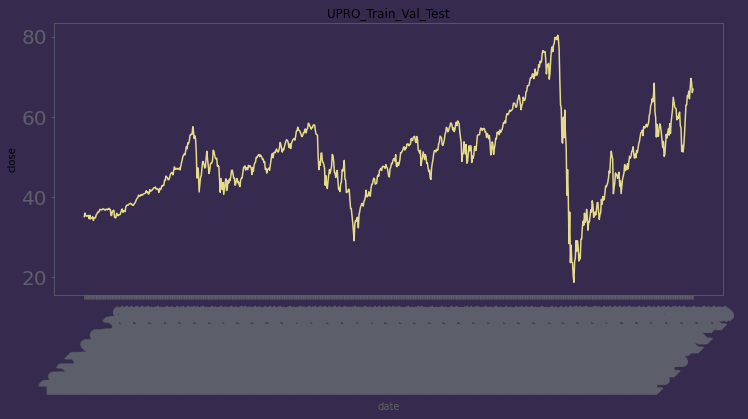

In [72]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
fig.set_facecolor(cback1)
ax.title.set_text('UPRO_Train_Val_Test')
ax.set_facecolor(cback1)
ax.spines['bottom'].set_color(cfont1)
ax.spines['top'].set_color(cfont1)
ax.spines['right'].set_color(cfont1)
ax.spines['left'].set_color(cfont1)
ax.xaxis.label.set_color(cfont1)
ax.tick_params(axis='x', colors=cfont1, labelsize=20)
ax.tick_params(axis='y', colors=cfont1, labelsize=20)
plt.xticks(rotation = 45)
sns.lineplot(data=df[train_start_ind:train_end_ind], y='close', x='date', color=c2)
sns.lineplot(data=df[val_start_ind:val_end_ind], y='close', x='date', color=c6)
# sns.lineplot(data=df_invest_1[test_start_ind:test_end_ind], y='close', x='date', color=c1)

In [73]:
df[train_start_ind:train_end_ind].describe()

open   high    low  close  adjClose      volume  unadjustedVolume  \
count 865.00 865.00 865.00 865.00    865.00      865.00            865.00   
mean   49.47  50.21  48.60  49.44     49.09  5878150.08        5878150.08   
std    10.26  10.23  10.26  10.24     10.29  4552880.49        4552880.49   
min    20.14  20.47  17.51  18.63     18.58   869600.00         869600.00   
25%    42.45  43.54  41.55  42.54     42.17  3020100.00        3020100.00   
50%    49.18  50.00  48.24  49.07     48.66  4389300.00        4389300.00   
75%    55.76  56.28  54.70  55.50     55.24  6968900.00        6968900.00   
max    79.97  80.87  79.73  80.36     80.14 31709200.00       31709200.00   

       change  changePercent   vwap  changeOverTime  day_low  14day_low  \
count  865.00         865.00 865.00          865.00   865.00     865.00   
mean    -0.02           0.00  49.42            0.00    48.60      44.71   
std      1.24           2.73  10.23            0.03    10.26       9.83   
min     -7.26         -16.67  18.87           -0.17    17.51      17.51   
25%     -0.45          -0.87  42.47           -0.01    41.55      39.12   
50%      0.08           0.16  49.08            0.00    48.24      44.84   
75%      0.55           1.14  55.59            0.01    54.70      50.48   
max      5.86          13.76  80.32            0.14    79.73      70.32   

       day_high  14day_high  close_pct_change  fast_k  fast_d  slow_k  slow_d  \
count    865.00      865.00            865.00  865.00  865.00  865.00  865.00   
mean      50.21       52.96              0.00    0.66    0.66    0.66    0.66   
std       10.23       10.48              0.04    0.30    0.28    0.27    0.27   
min       20.47       29.54             -0.35    0.00    0.02    0.04    0.05   
25%       43.54       46.83             -0.01    0.44    0.43    0.44    0.45   
50%       50.00       52.46              0.00    0.76    0.77    0.77    0.76   
75%       56.28       58.43              0.02    0.93    0.91    0.90    0.89   
max       80.87       80.87              0.28    1.00    0.99    0.99    0.98   

       fast_k_pct_change  14week_high  14week_low  fast_k_weekly  \
count             865.00       865.00      865.00         865.00   
mean                1.83        57.56       37.69          -0.31   
std                29.42        11.41        9.19           0.29   
min                -1.00        35.61       17.51          -1.00   
25%                -0.12        51.45       31.69          -0.53   
50%                 0.00        57.48       38.93          -0.21   
75%                 0.18        59.13       43.58          -0.05   
max               804.06        80.87       60.27           0.00   

       fast_d_weekly  slow_k_weekly  slow_d_weekly  ema_12  ema_26   MACD  \
count         865.00         865.00         865.00  865.00  865.00 865.00   
mean           -0.31          -0.31          -0.31   49.25   49.04   0.21   
std             0.29           0.28           0.28    9.73    9.12   2.13   
min            -0.98          -0.97          -0.97   27.16   34.12 -12.84   
25%            -0.53          -0.53          -0.53   43.43   42.77  -0.35   
50%            -0.21          -0.22          -0.21   48.74   48.77   0.71   
75%            -0.06          -0.06          -0.06   55.15   54.60   1.30   
max            -0.00          -0.00          -0.01   78.10   75.99   3.65   

       slow_MACD  diff_MACD  ema_12_weekly  ema_26_weekly  MACD_weekly  \
count     865.00     865.00         865.00         865.00       865.00   
mean        0.21       0.01          48.56          47.72         0.83   
std         2.00       0.65           8.00           7.09         2.80   
min       -11.26      -3.27          33.38          32.40        -8.01   
25%        -0.30      -0.17          42.95          44.97         0.47   
50%         0.66       0.06          48.11          47.82         1.38   
75%         1.27       0.28          53.71          51.65         2.48   
max      

In [74]:
df_seas_compon = seasonal_decompose(df_train['close'],\
                                    model='additive', freq = 5)

### def plot_seasonal_comp

In [75]:
def plot_seasonal_comp(df_seas_compon):
    fig, ax = plt.subplots(3,1, figsize=(25,15))
    fig.set_facecolor(cback1)
    # plt.xticks(rotation = 45, ax=ax[0])
    # ax[0].title.set_text('URPO')
    ax[0].set_facecolor(cback1)
    ax[0].spines['bottom'].set_color(cfont1)
    ax[0].spines['top'].set_color(cfont1)
    ax[0].spines['right'].set_color(cfont1)
    ax[0].spines['left'].set_color(cfont1)
    ax[0].xaxis.label.set_color(cfont1)
    ax[0].yaxis.label.set_color(cfont1)
    ax[0].tick_params(axis='x', colors=cfont1, labelsize=20)
    ax[0].tick_params(axis='y', colors=cfont1, labelsize=20)
    sns.lineplot(data=df_seas_compon.trend,
                 color=c1,
                ax=ax[0])

    ax[1].set_facecolor(cback1)
    ax[1].spines['bottom'].set_color(cfont1)
    ax[1].spines['top'].set_color(cfont1)
    ax[1].spines['right'].set_color(cfont1)
    ax[1].spines['left'].set_color(cfont1)
    ax[1].xaxis.label.set_color(cfont1)
    ax[1].yaxis.label.set_color(cfont1)
    ax[1].tick_params(axis='x', colors=cfont1, labelsize=20)
    ax[1].tick_params(axis='y', colors=cfont1, labelsize=20)
    sns.lineplot(data=df_seas_compon.seasonal,
                 color=c4,
                ax=ax[1])

    ax[2].set_facecolor(cback1)
    ax[2].spines['bottom'].set_color(cfont1)
    ax[2].spines['top'].set_color(cfont1)
    ax[2].spines['right'].set_color(cfont1)
    ax[2].spines['left'].set_color(cfont1)
    ax[2].xaxis.label.set_color(cfont1)
    ax[2].yaxis.label.set_color(cfont1)
    ax[2].tick_params(axis='x', colors=cfont1, labelsize=20)
    ax[2].tick_params(axis='y', colors=cfont1, labelsize=20)
    sns.scatterplot(data=df_seas_compon.resid,
                 color=c3,
                ax=ax[2])


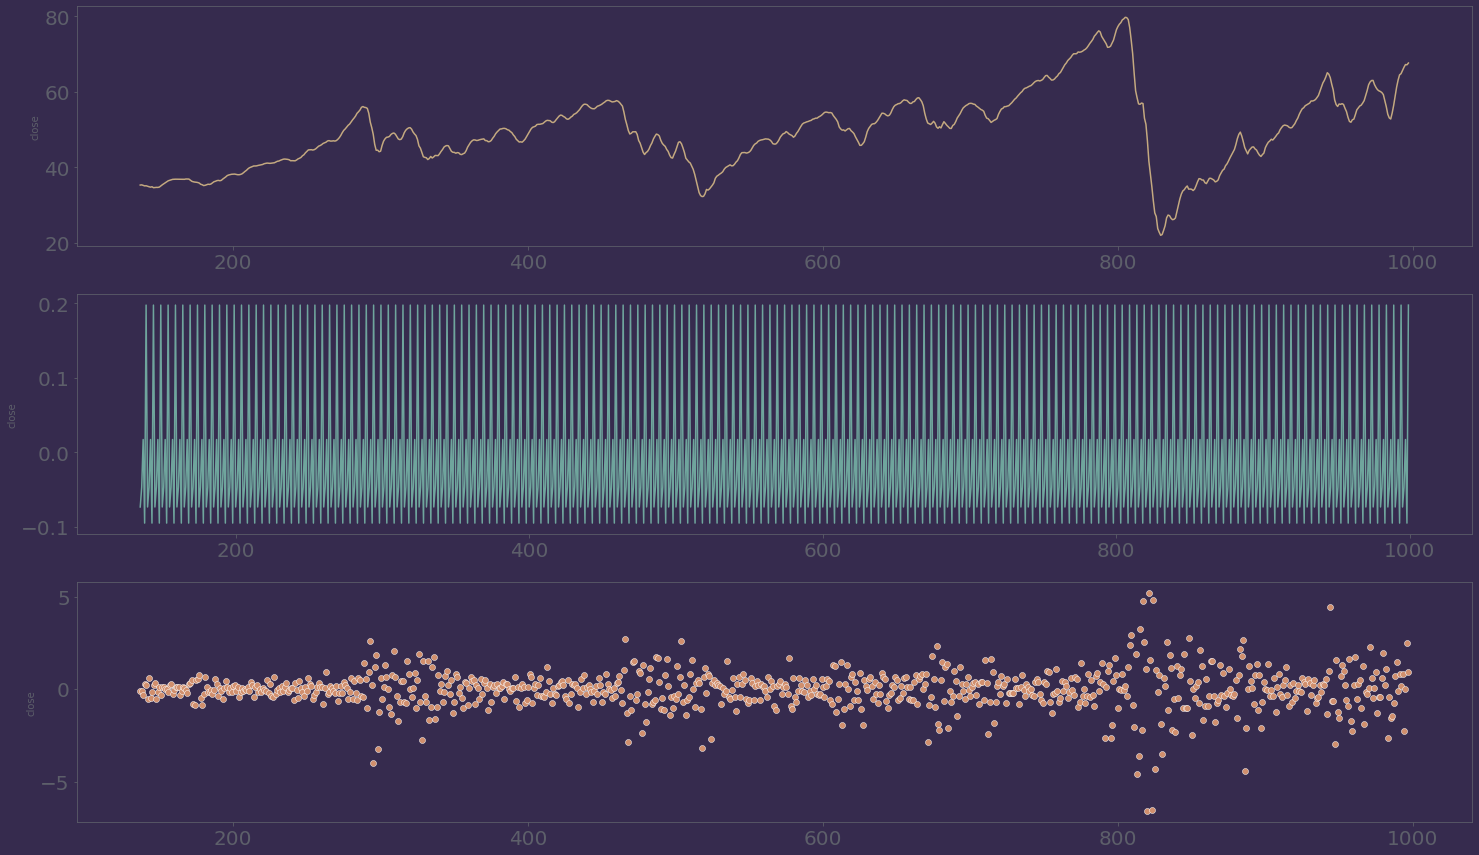

In [76]:
plot_seasonal_comp(df_seas_compon)

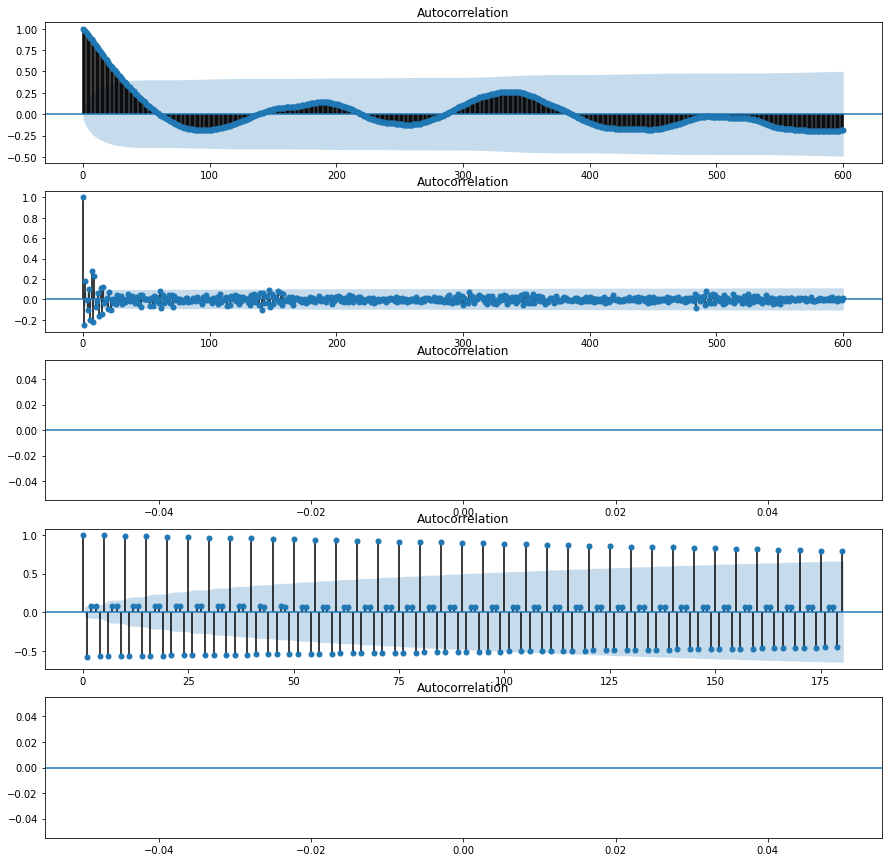

In [77]:
fig, ax = plt.subplots(5,1, figsize=(15,15))
sm.graphics.tsa.plot_acf(df_train['close'].values.squeeze(), lags=600, ax=ax[0])
sm.graphics.tsa.plot_acf(df_train['close_pct_change'].values.squeeze(), lags=600, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon.trend.values.squeeze(), lags=180, ax=ax[2])
sm.graphics.tsa.plot_acf(df_seas_compon.seasonal.values.squeeze(), lags=180, ax=ax[3])
sm.graphics.tsa.plot_acf(df_seas_compon.resid.values.squeeze(), lags=180, ax=ax[4])
plt.show()

## Close pct_change

In [78]:
df_seas_compon_close_pct_change = seasonal_decompose(df_train['close_pct_change'],\
                                    model='additive', freq = 5)

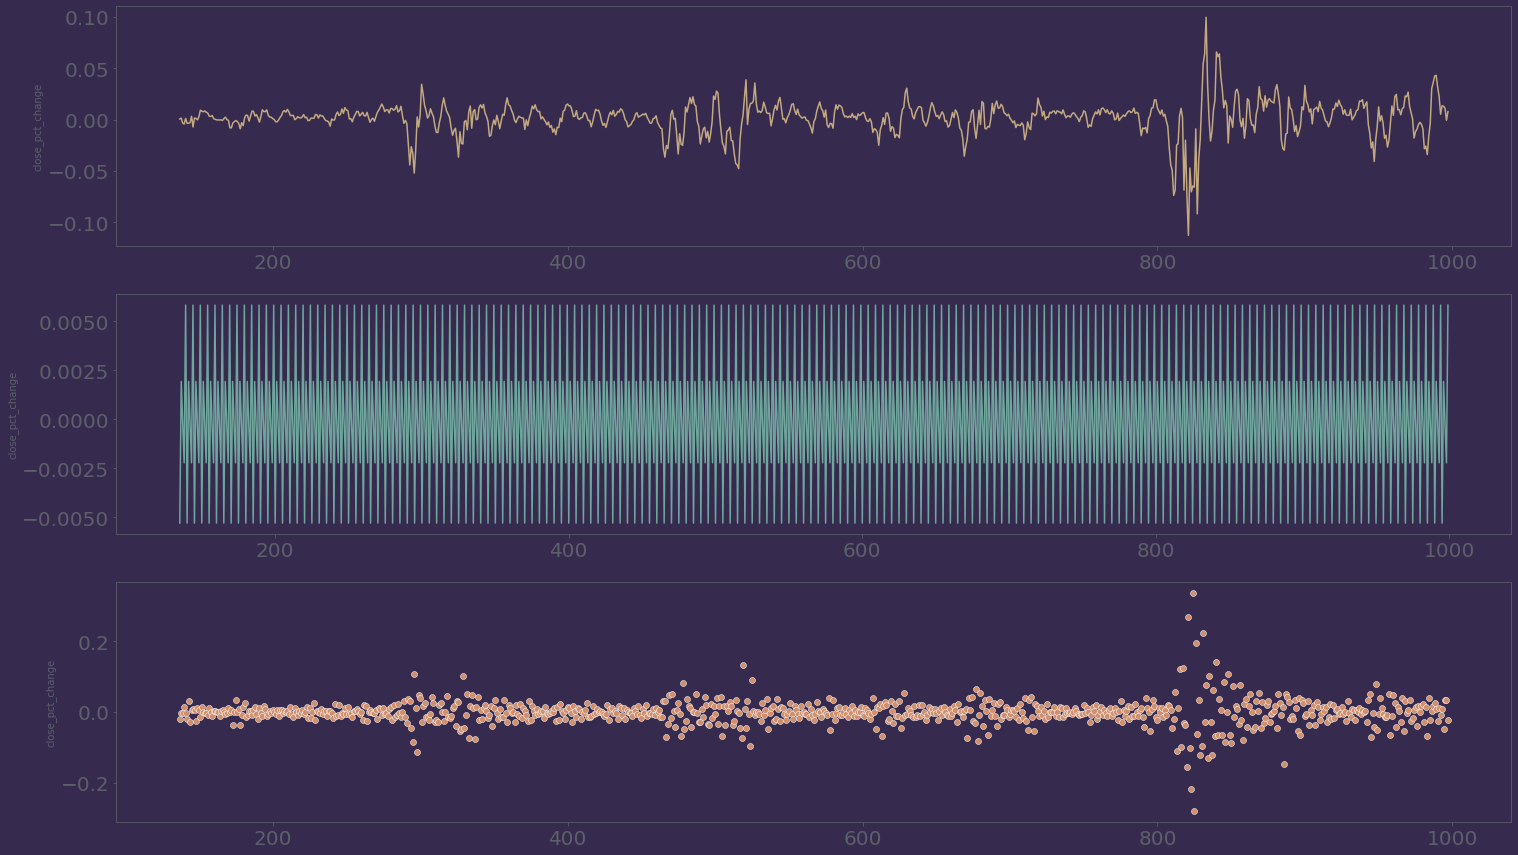

In [79]:
plot_seasonal_comp(df_seas_compon_close_pct_change)


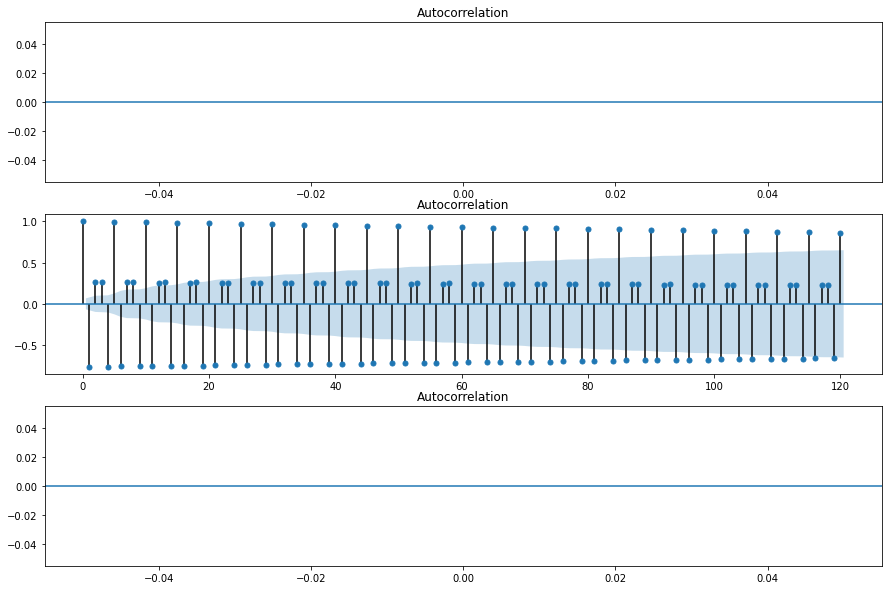

In [80]:
fig, ax = plt.subplots(3,1, figsize=(15,10))

sm.graphics.tsa.plot_acf(df_seas_compon_close_pct_change.trend.values.squeeze(), lags=160, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_close_pct_change.seasonal.values.squeeze(), lags=120, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_close_pct_change.resid.values.squeeze(), lags=160, ax=ax[2])
plt.show()

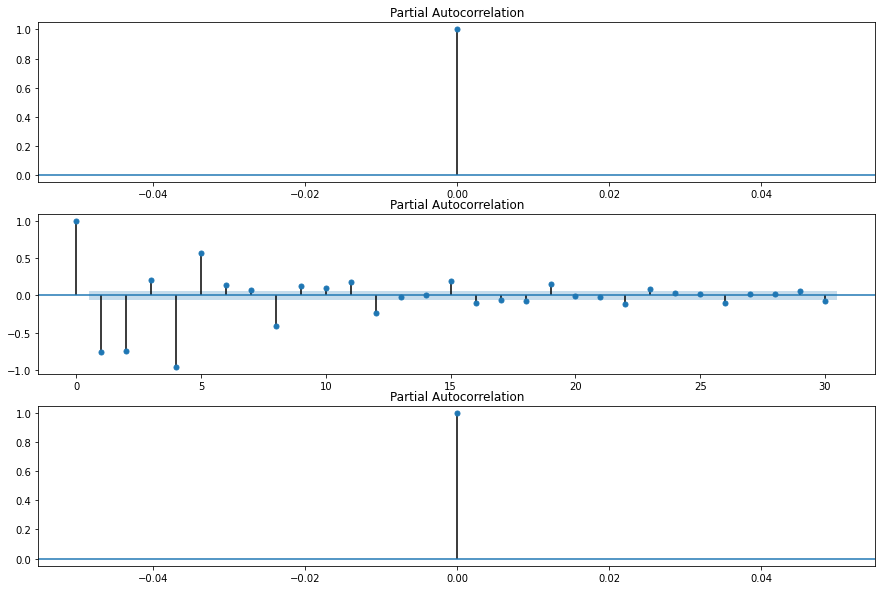

In [81]:
fig, ax = plt.subplots(3,1, figsize=(15,10))

sm.graphics.tsa.plot_pacf(df_seas_compon_close_pct_change.trend.values.squeeze(), lags=30, method='ywmle', ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_close_pct_change.seasonal.values.squeeze(), lags=30, method='ywmle', ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_close_pct_change.resid.values.squeeze(), lags=30, method='ywmle', ax=ax[2])
plt.show()

## fast_k

In [82]:
df_seas_compon_fast_k = seasonal_decompose(df_train['fast_k'], #train_end_ind\ 
                                    model='additive', freq = 5)

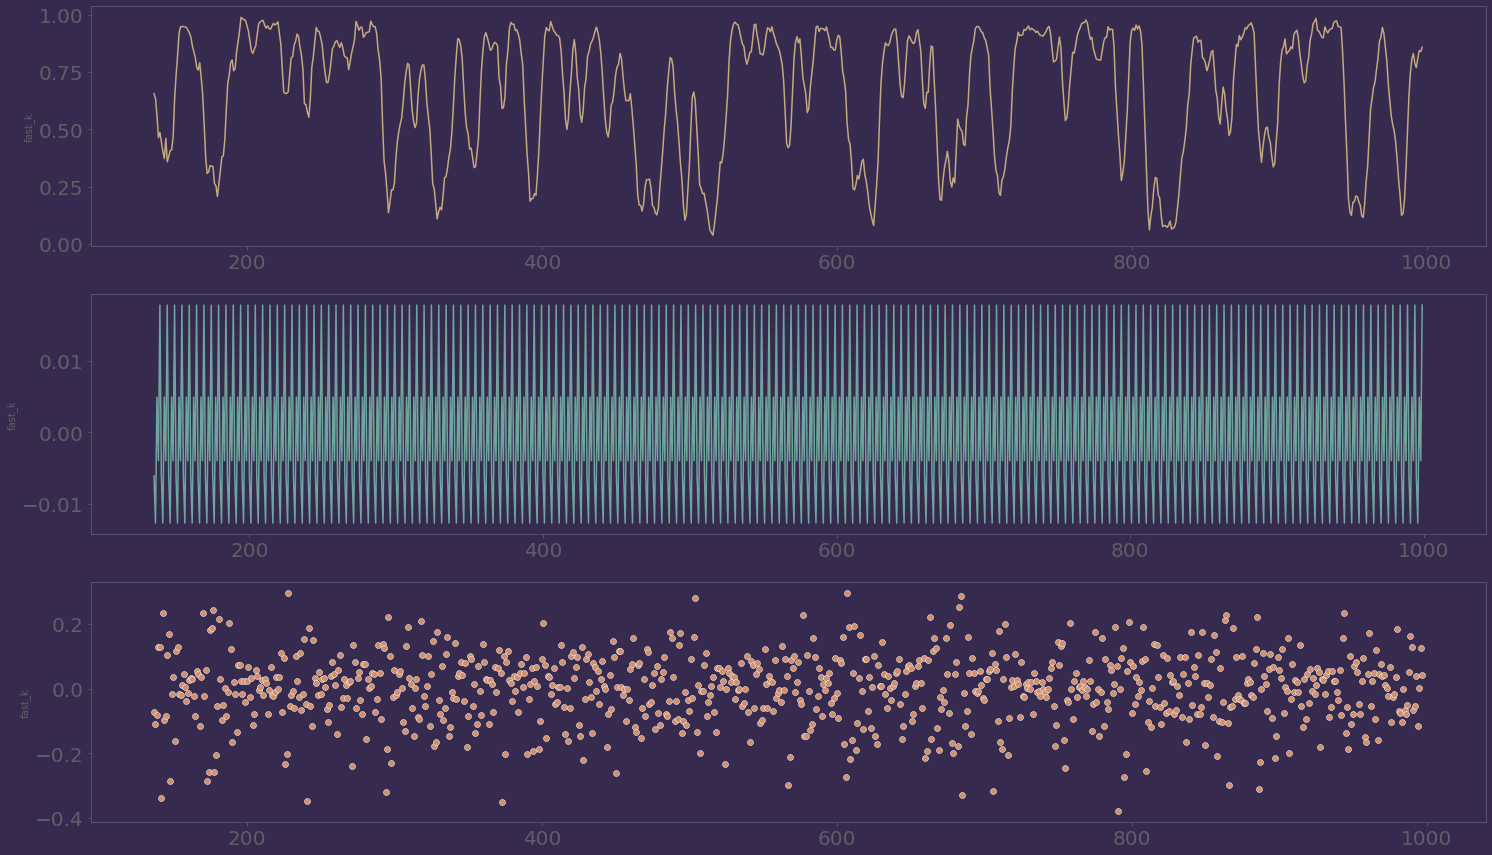

In [83]:
plot_seasonal_comp(df_seas_compon_fast_k)

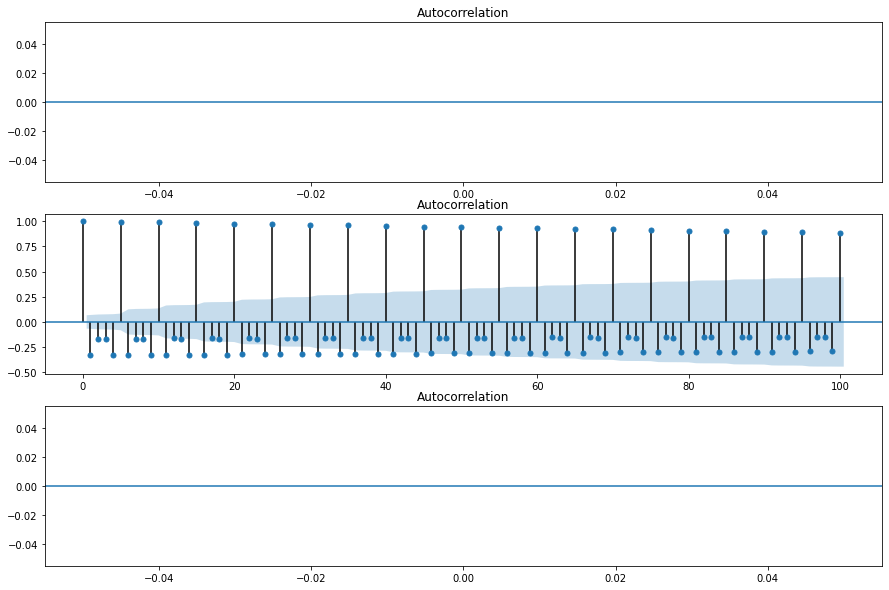

In [84]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_fast_k.trend.values.squeeze(), lags=360, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_fast_k.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_fast_k.resid.values.squeeze(), lags=360, ax=ax[2])
plt.show()

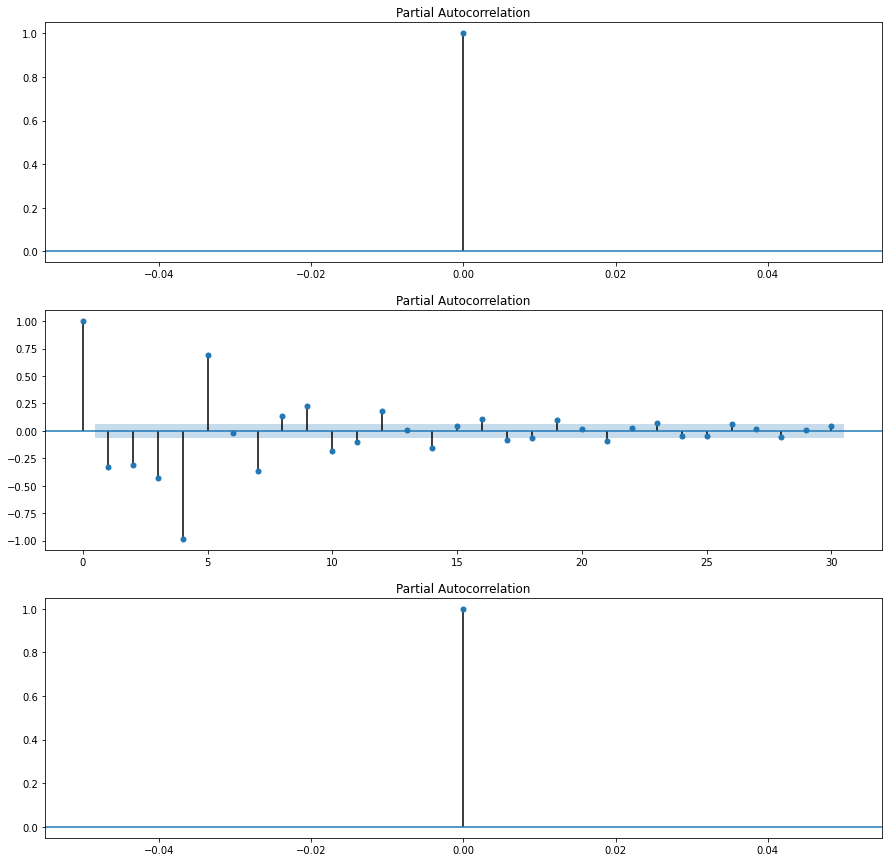

In [85]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_k.trend.values.squeeze(), lags=30, method='ywmle', ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_k.seasonal.values.squeeze(), lags=30, method='ywmle', ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_k.resid.values.squeeze(), lags=30, method='ywmle', ax=ax[2])
plt.show()

## fast_d

In [86]:
df_seas_compon_fast_d = seasonal_decompose(df_train['fast_d'],\
                                    model='additive', freq = 5)

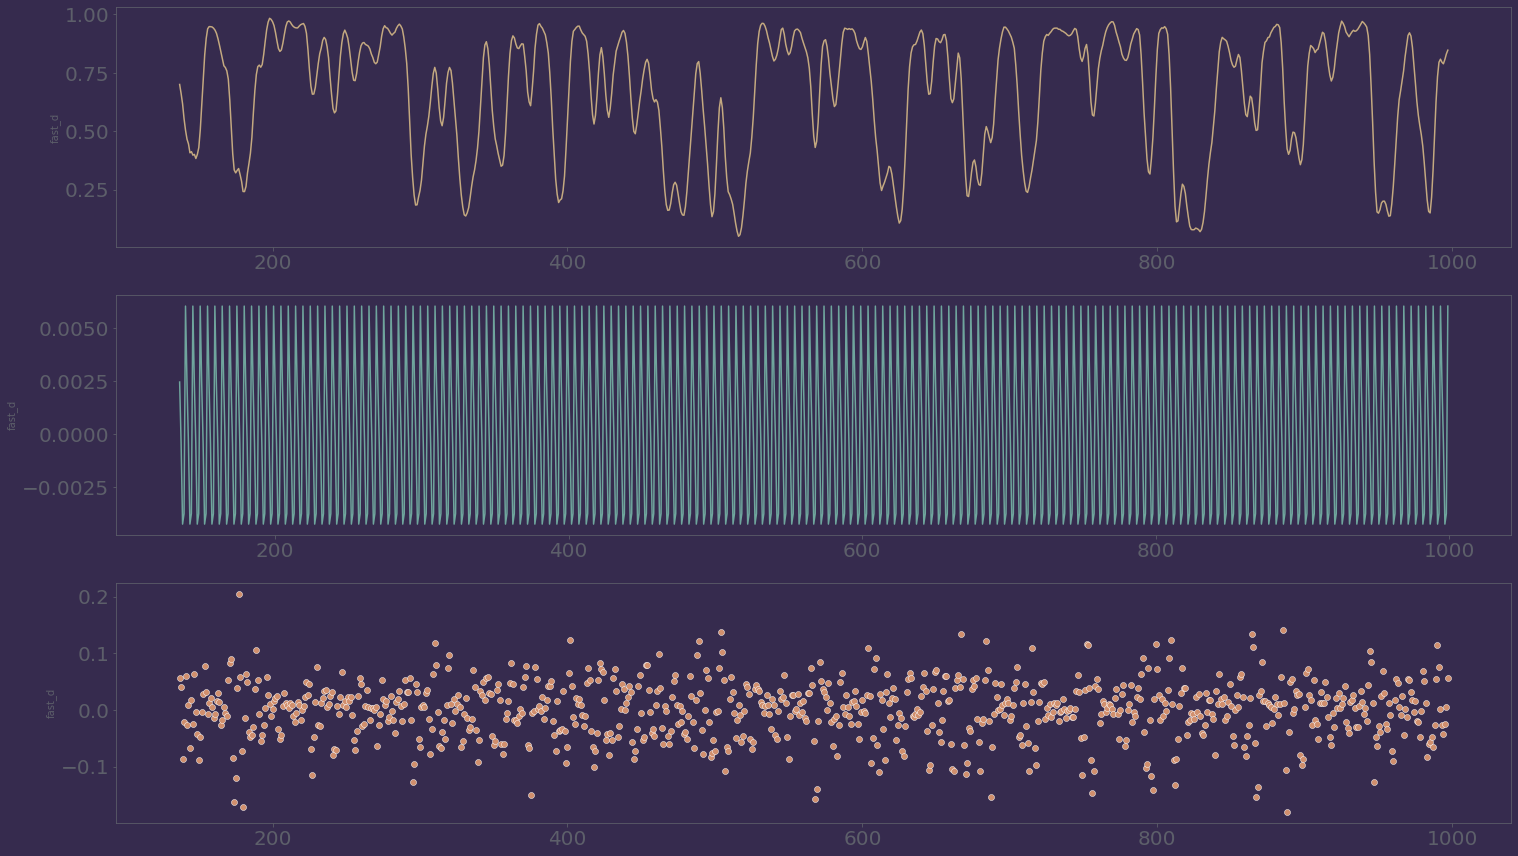

In [87]:
plot_seasonal_comp(df_seas_compon_fast_d)

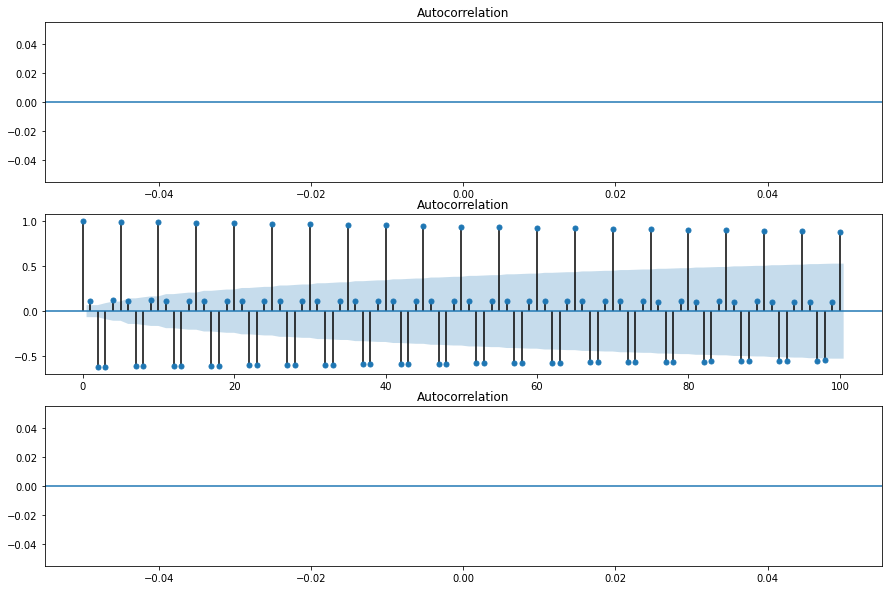

In [88]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_fast_d.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_fast_d.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_fast_d.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

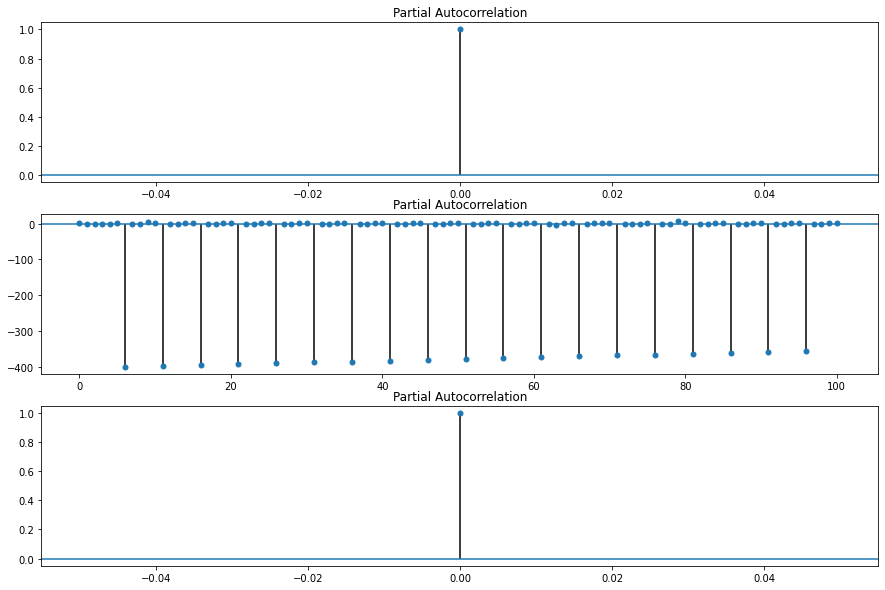

In [89]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_d.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_d.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_d.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

## slow_k

In [90]:
df_seas_compon_slow_k = seasonal_decompose(df_train['slow_k'],\
                                    model='additive', freq = 5)

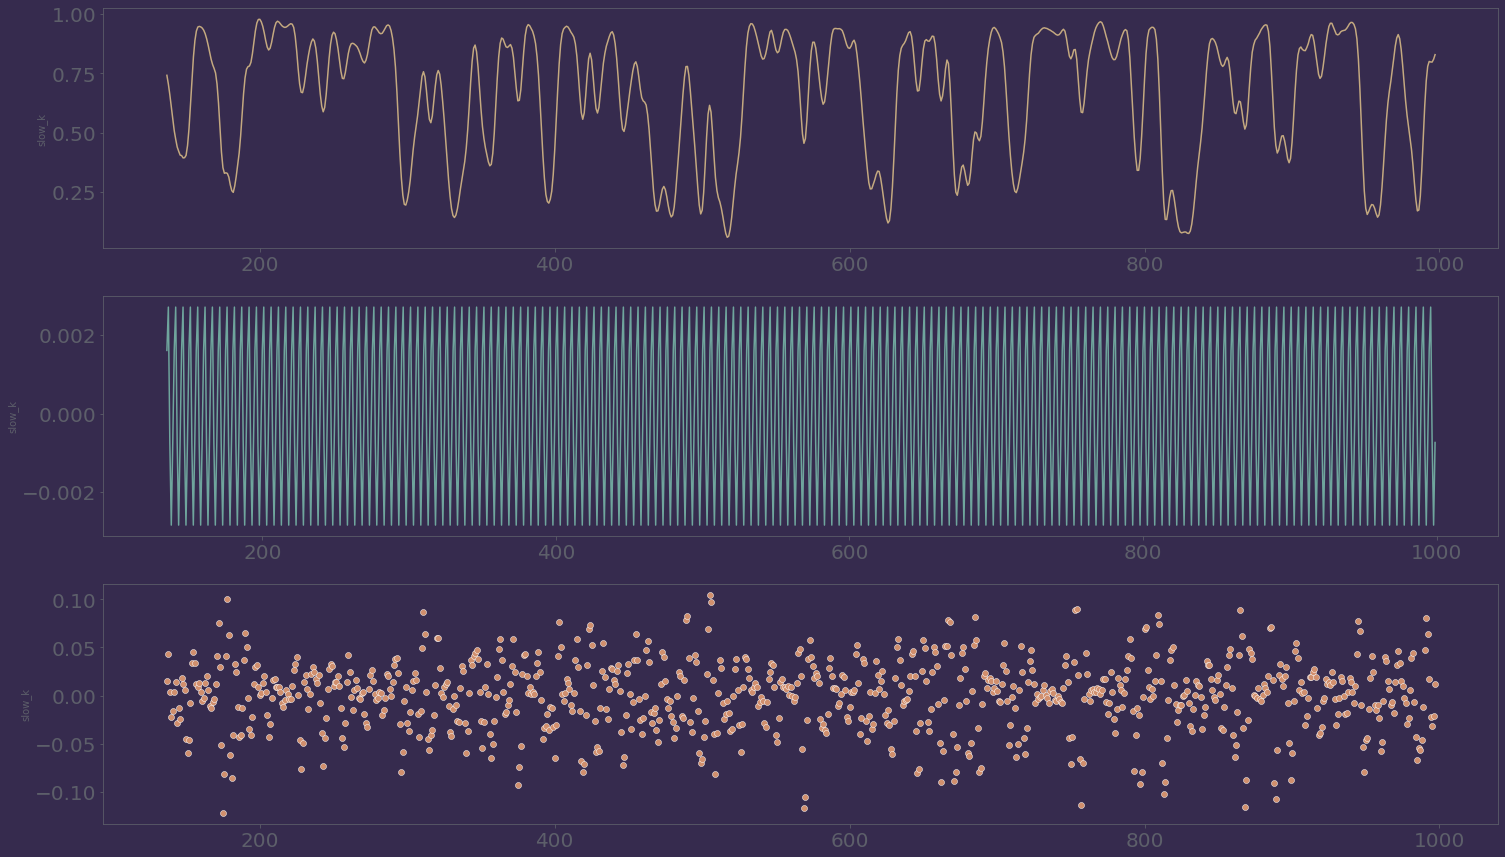

In [91]:
plot_seasonal_comp(df_seas_compon_slow_k)

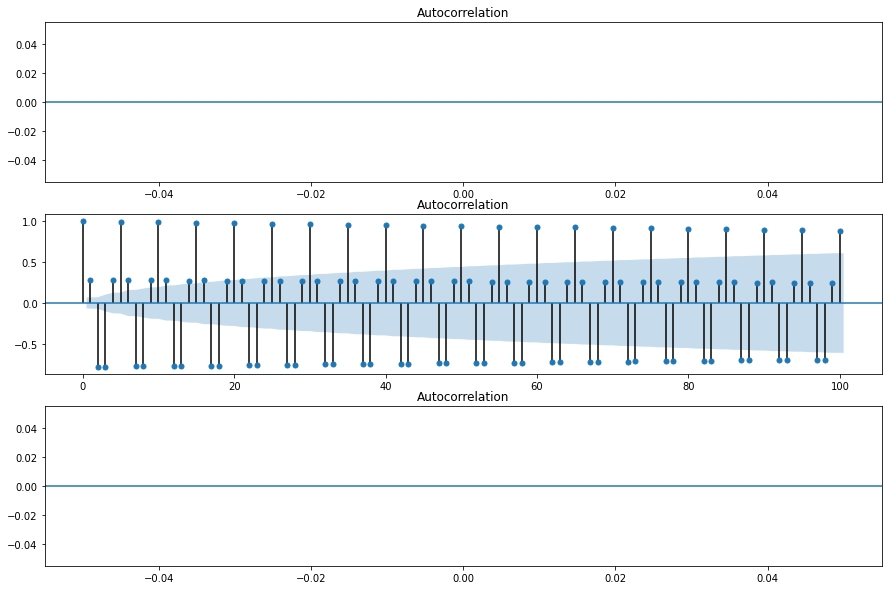

In [92]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_slow_k.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_slow_k.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_slow_k.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

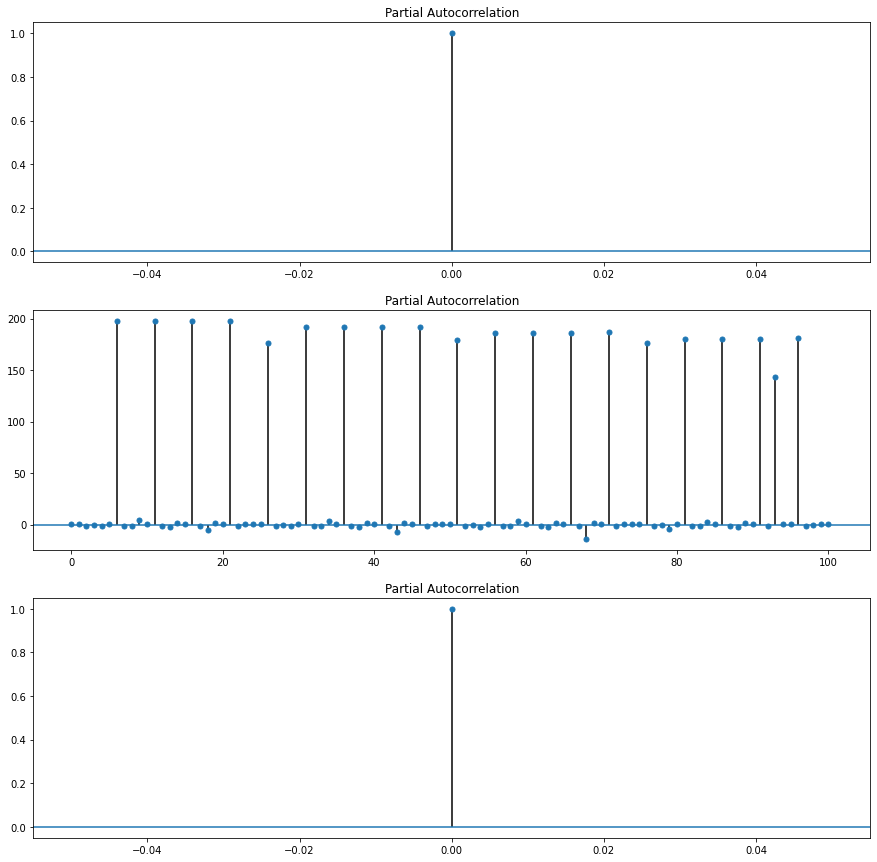

In [93]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
sm.graphics.tsa.plot_pacf(df_seas_compon_slow_k.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_slow_k.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_slow_k.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

## slow_d

In [94]:
df_seas_compon_slow_d = seasonal_decompose(df_train['slow_d'],\
                                    model='additive', freq = 5)

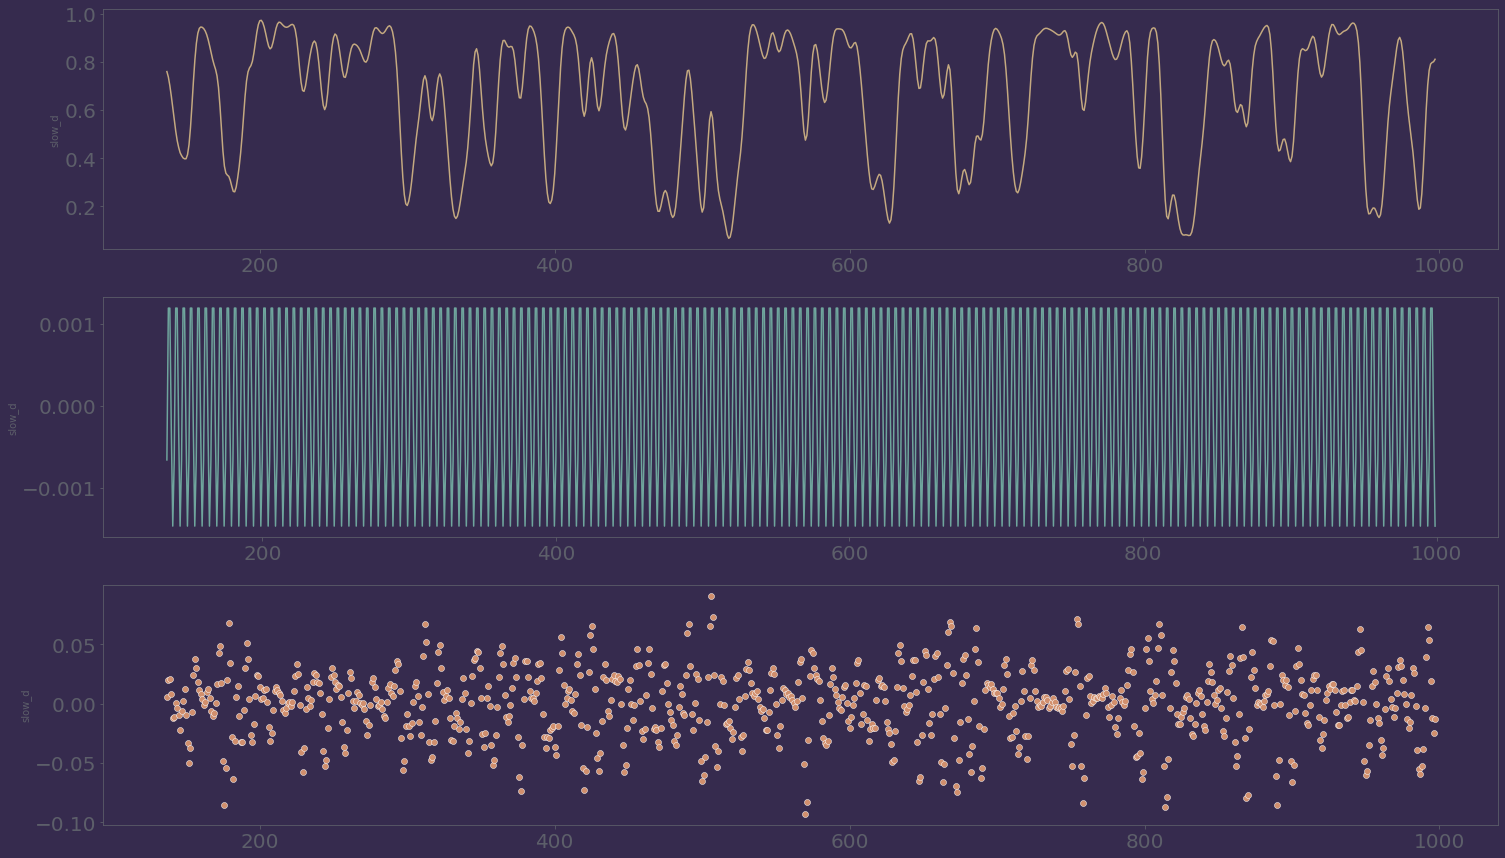

In [95]:
plot_seasonal_comp(df_seas_compon_slow_d)

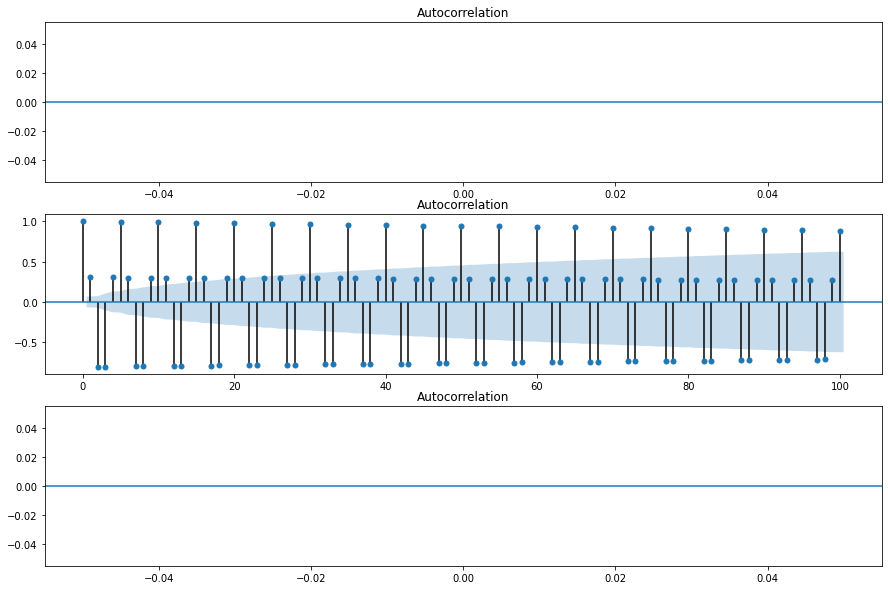

In [96]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_slow_d.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_slow_d.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_slow_d.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

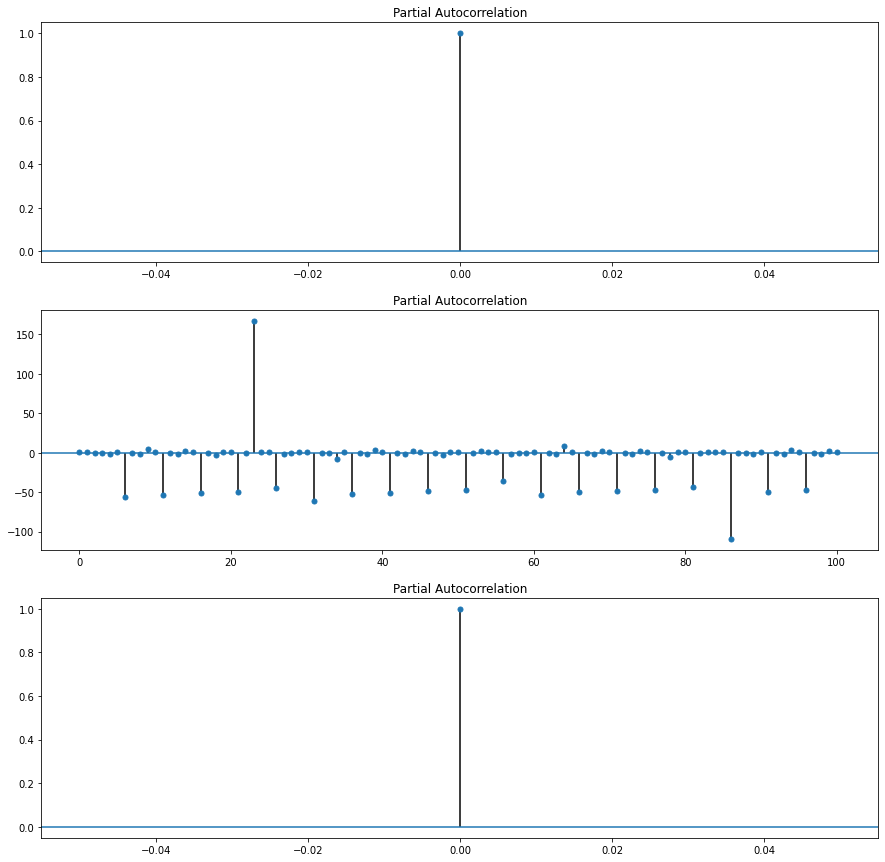

In [97]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
sm.graphics.tsa.plot_pacf(df_seas_compon_slow_d.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_slow_d.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_slow_d.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

## fast_k_weekly

In [98]:
df_seas_compon_fast_k_weekly = seasonal_decompose(df_train['fast_k_weekly'],\
                                    model='additive', freq = 6)

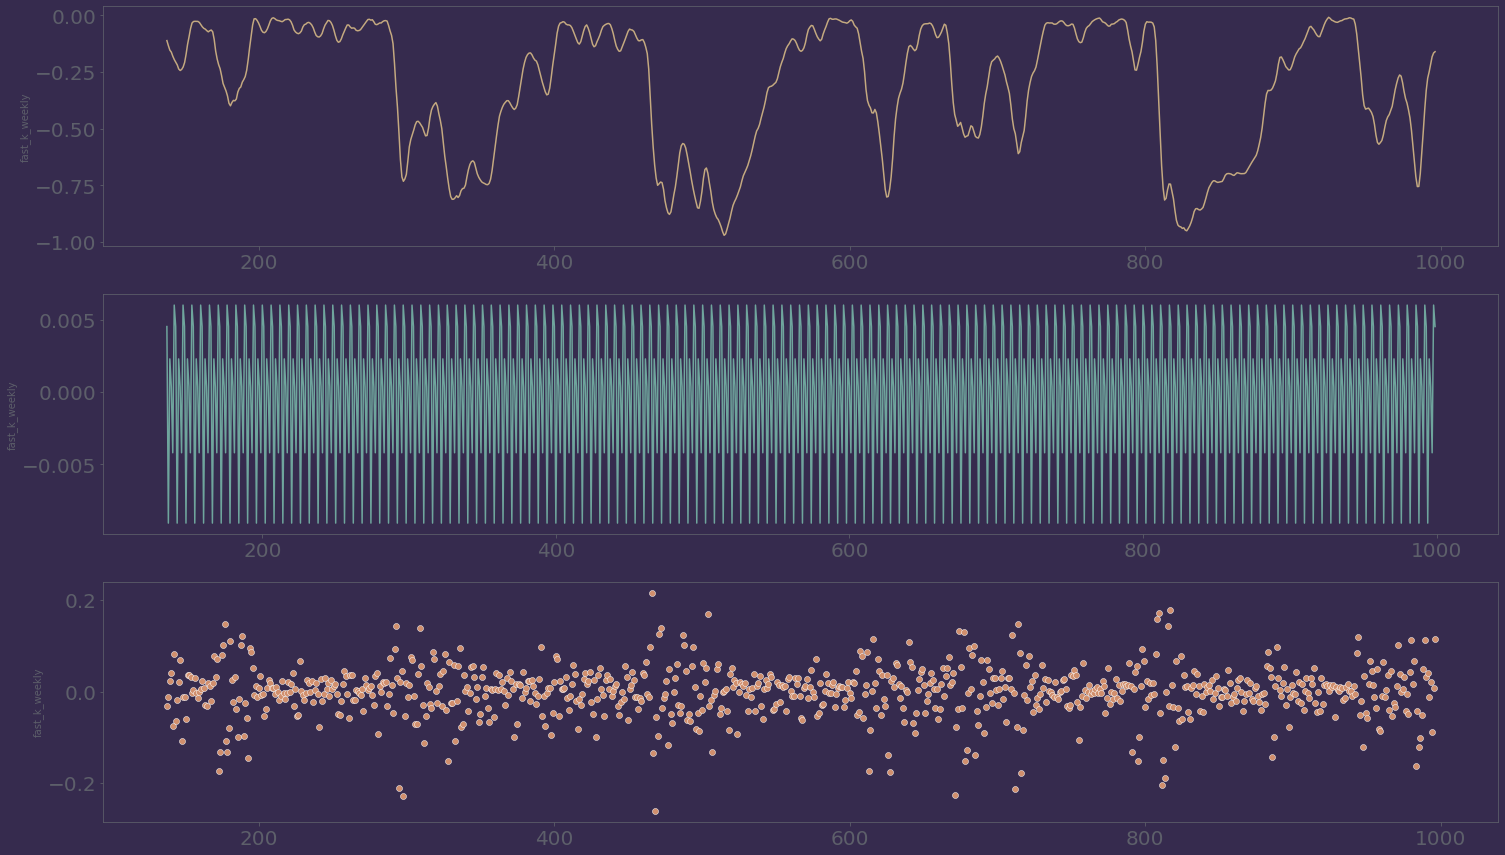

In [99]:
plot_seasonal_comp(df_seas_compon_fast_k_weekly)

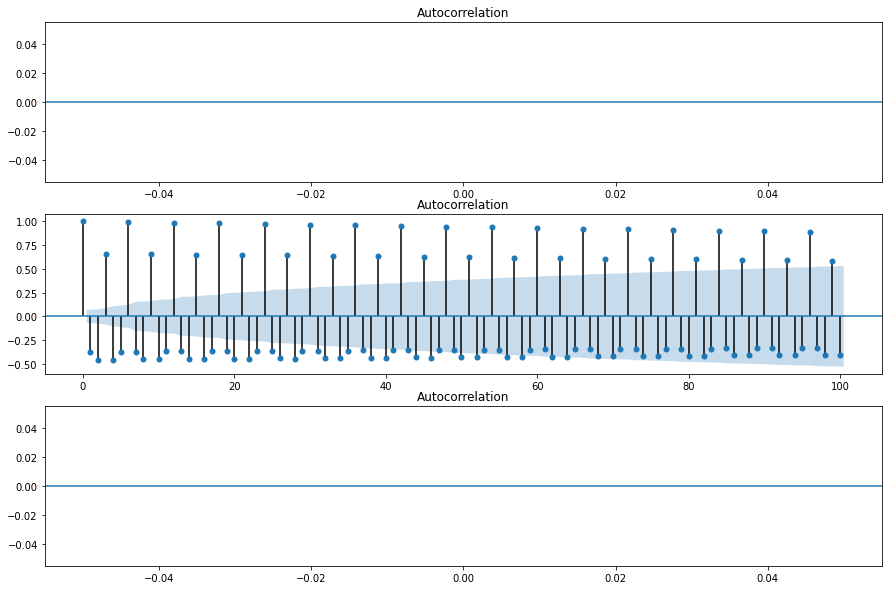

In [100]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_fast_k_weekly.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_fast_k_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_fast_k_weekly.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

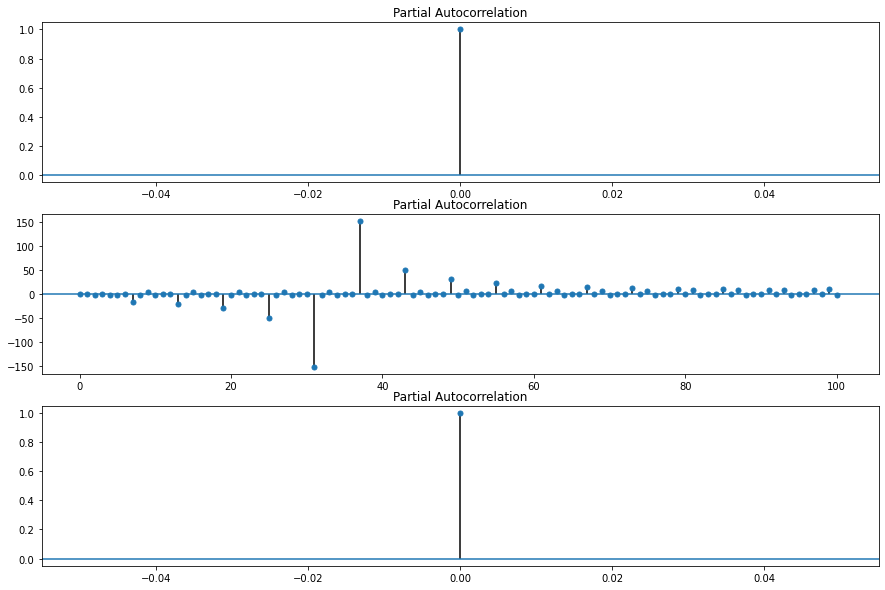

In [101]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_k_weekly.trend.values.squeeze(), lags=180, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_k_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_k_weekly.resid.values.squeeze(), lags=180, ax=ax[2])
plt.show()

## fast_d_weekly

In [102]:
df_seas_compon_fast_d_weekly = seasonal_decompose(df_train['fast_d_weekly'],\
                                    model='additive', freq = 5)

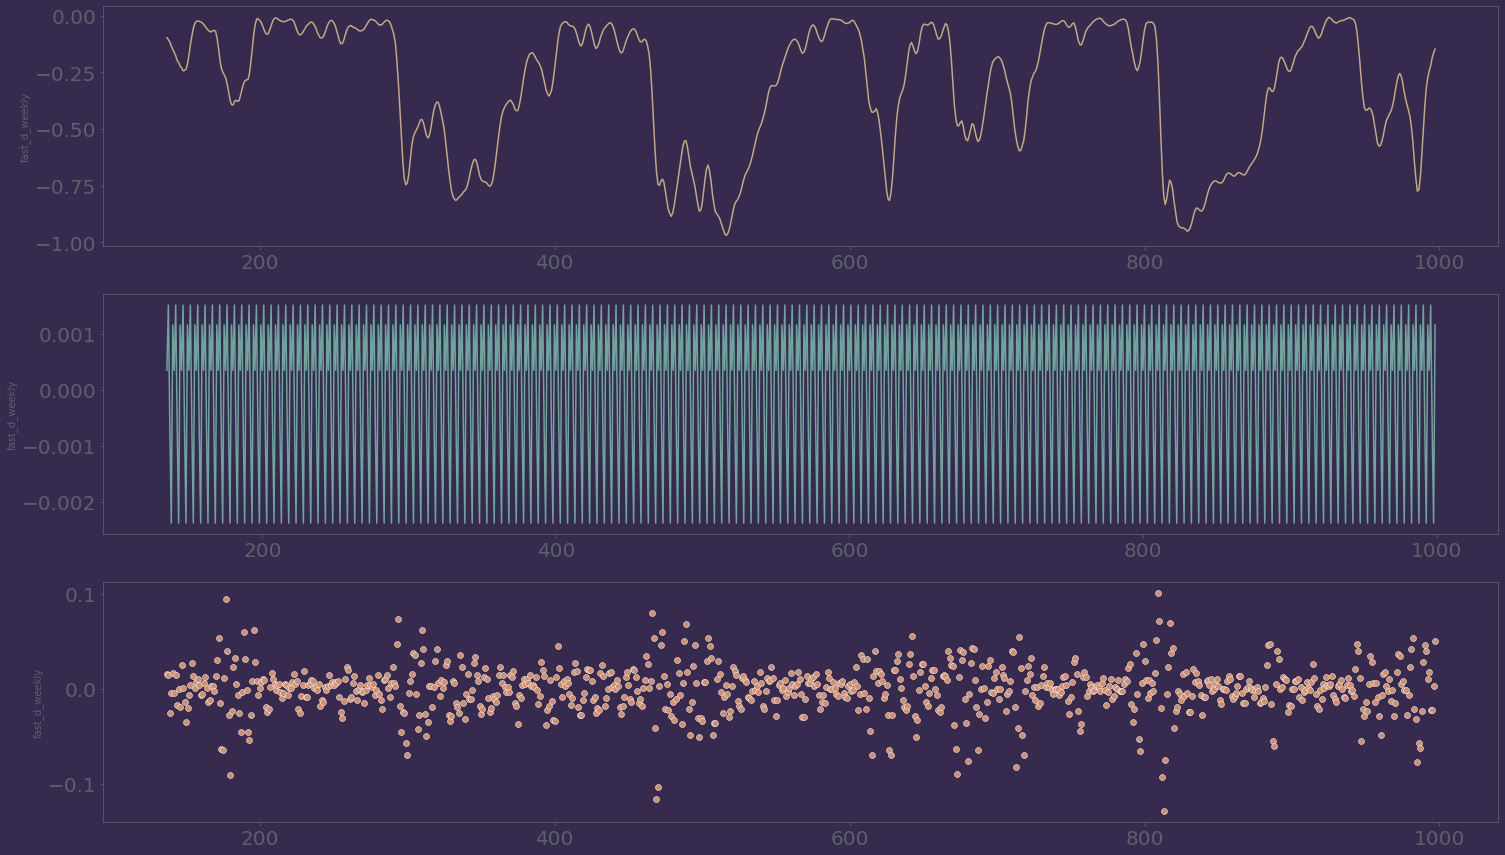

In [103]:
plot_seasonal_comp(df_seas_compon_fast_d_weekly)

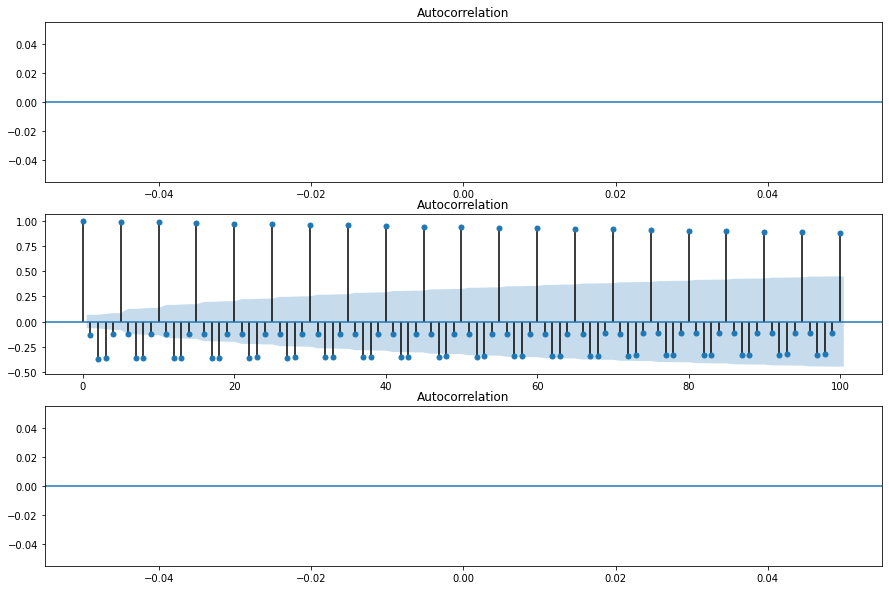

In [104]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_fast_d_weekly.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_fast_d_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_fast_d_weekly.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

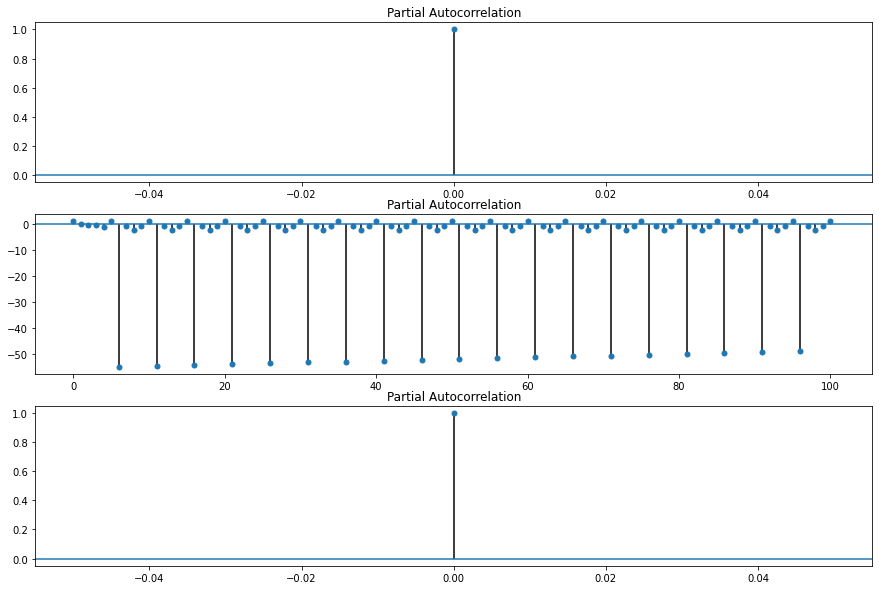

In [105]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_d_weekly.trend.values.squeeze(), lags=180, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_d_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_fast_d_weekly.resid.values.squeeze(), lags=180, ax=ax[2])
plt.show()

## MACD

In [106]:
df_seas_compon_diff_macd = seasonal_decompose(df_train['diff_MACD'],\
                                    model='additive', freq = 5)

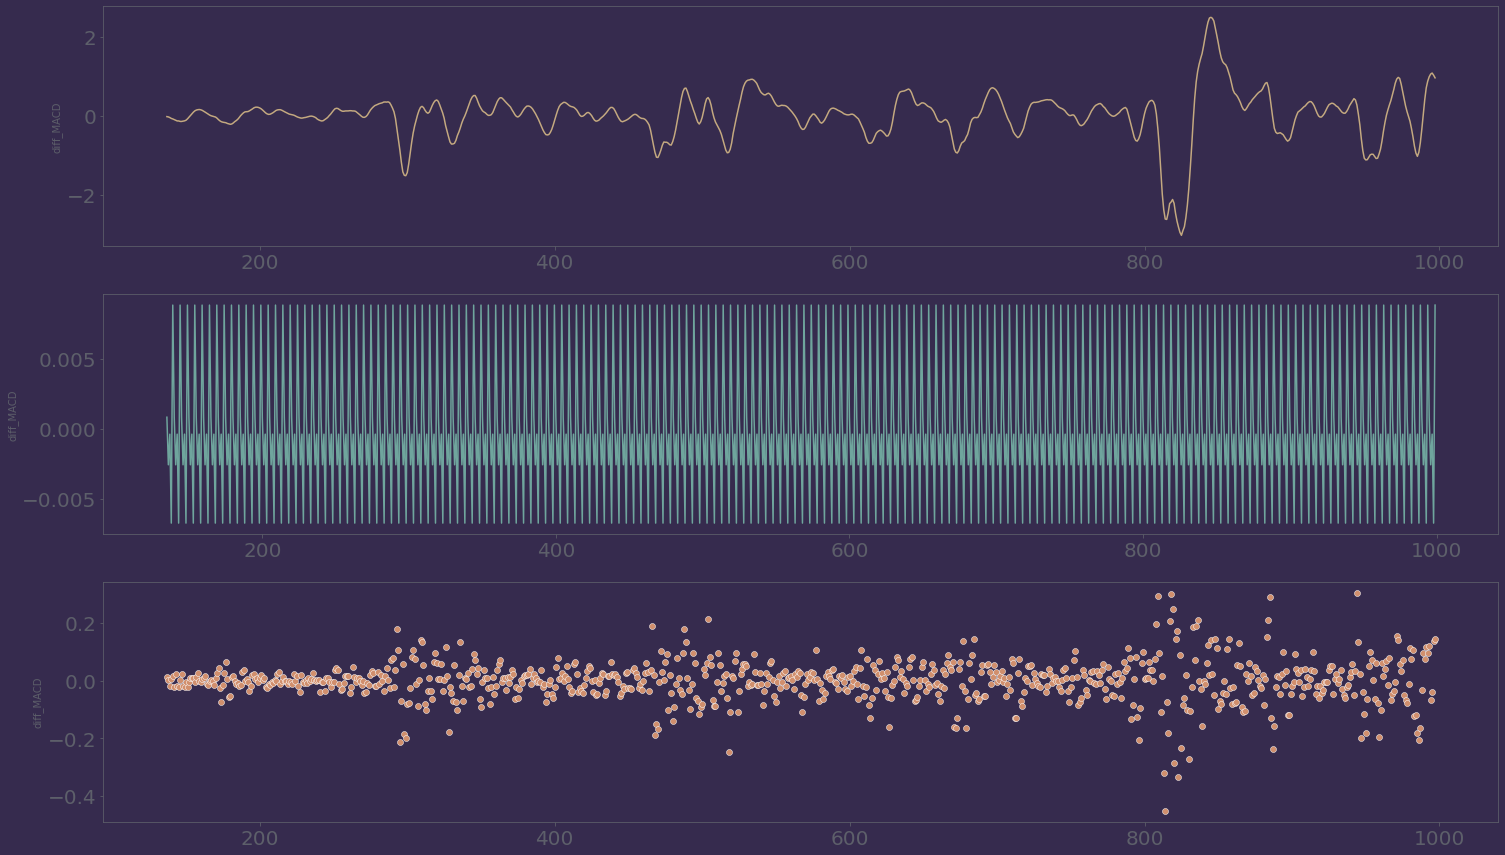

In [107]:
plot_seasonal_comp(df_seas_compon_diff_macd)

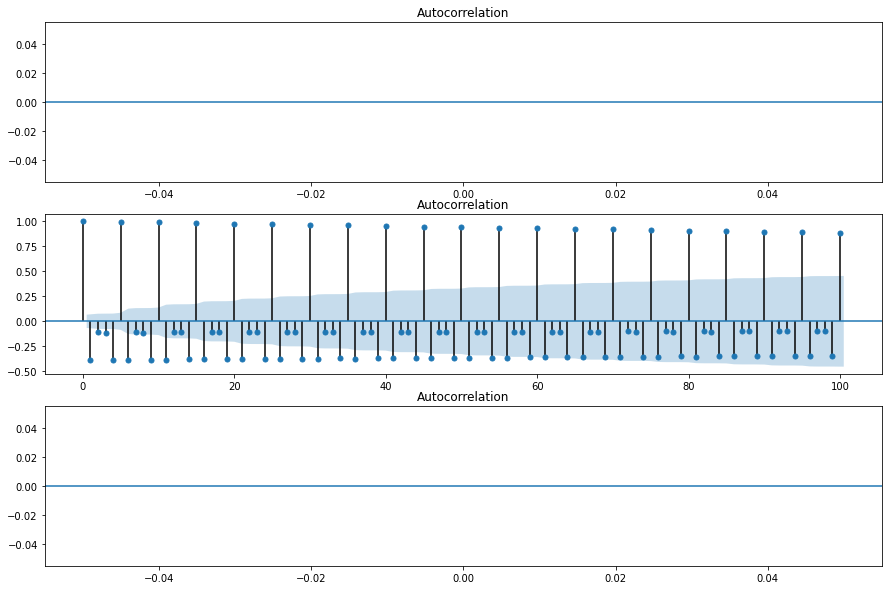

In [108]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_diff_macd.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_diff_macd.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_diff_macd.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

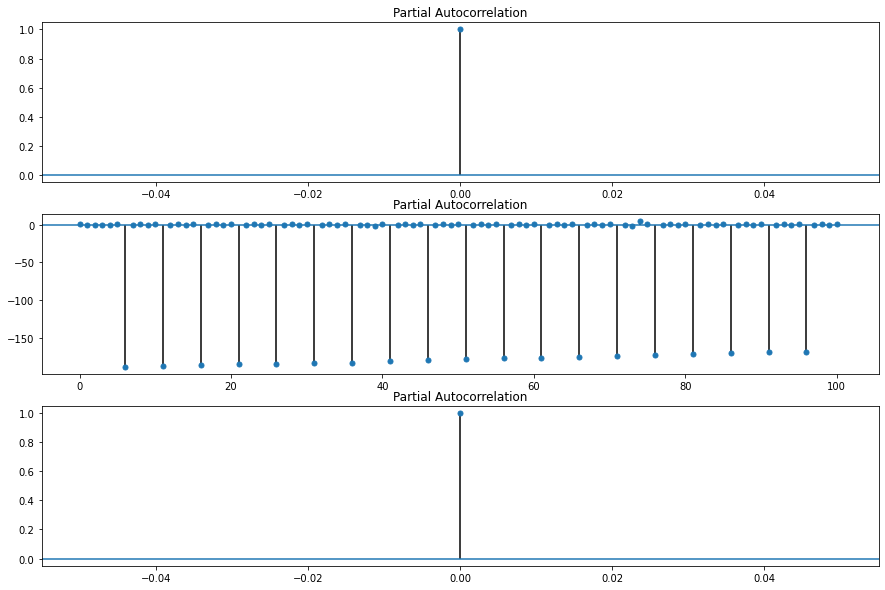

In [109]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_diff_macd.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_diff_macd.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_diff_macd.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

In [110]:
df_seas_compon_macd = seasonal_decompose(df_train['MACD'][26:train_end_ind],\
                                    model='additive', freq = 5)

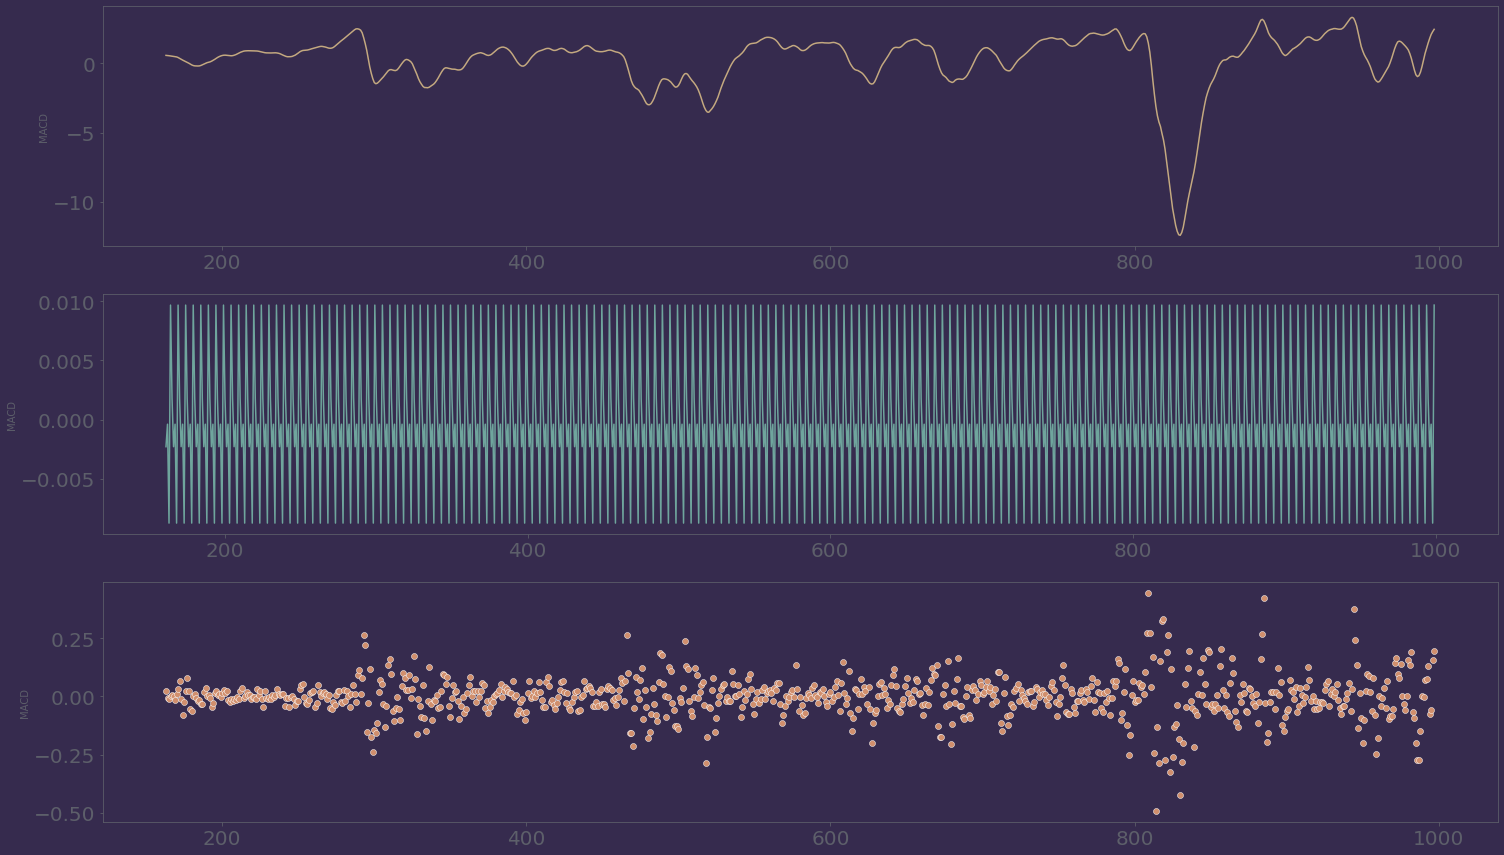

In [111]:
plot_seasonal_comp(df_seas_compon_macd)

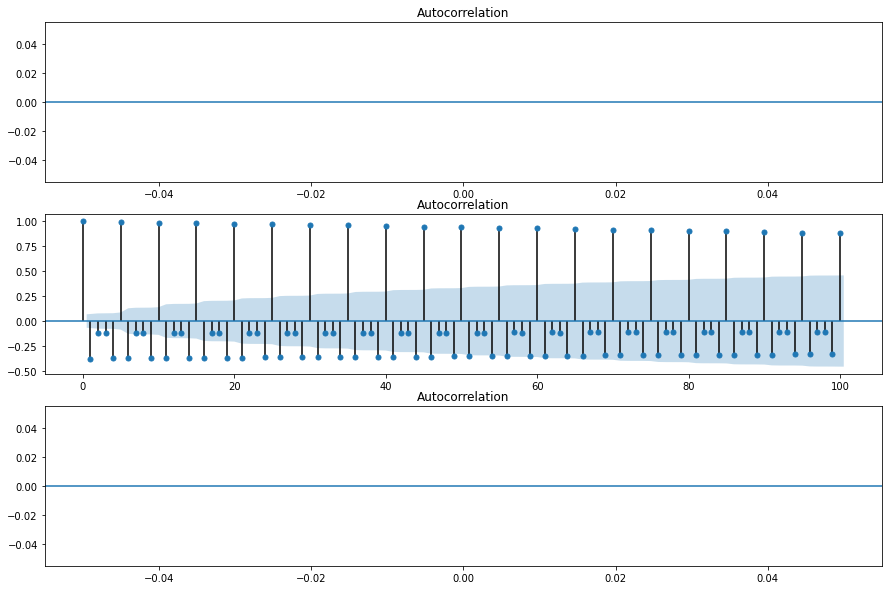

In [112]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_macd.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_macd.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_macd.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

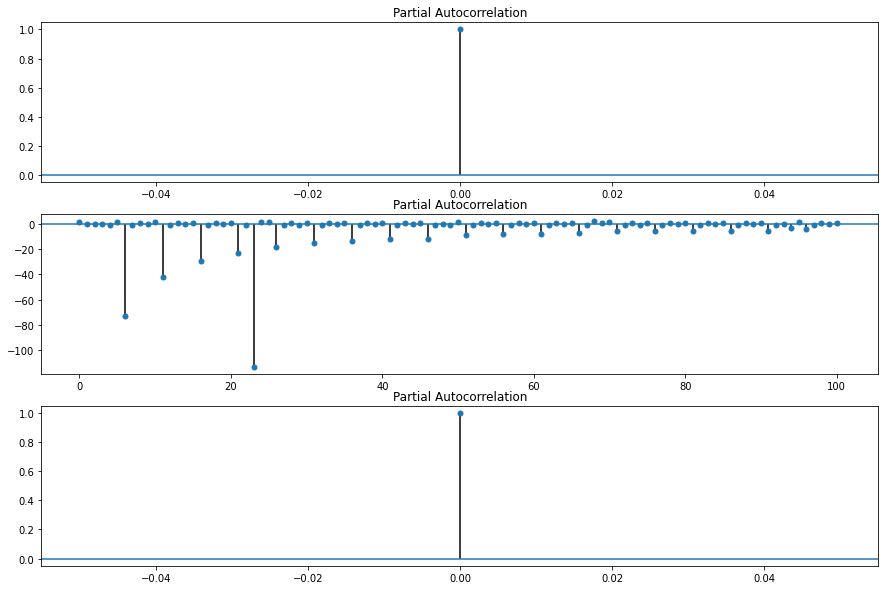

In [113]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_macd.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_macd.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_macd.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

## MACD_weekly

In [114]:
df_seas_compon_diff_macd_weekly = seasonal_decompose(df_train['diff_MACD_weekly'],\
                                    model='additive', freq = 5)

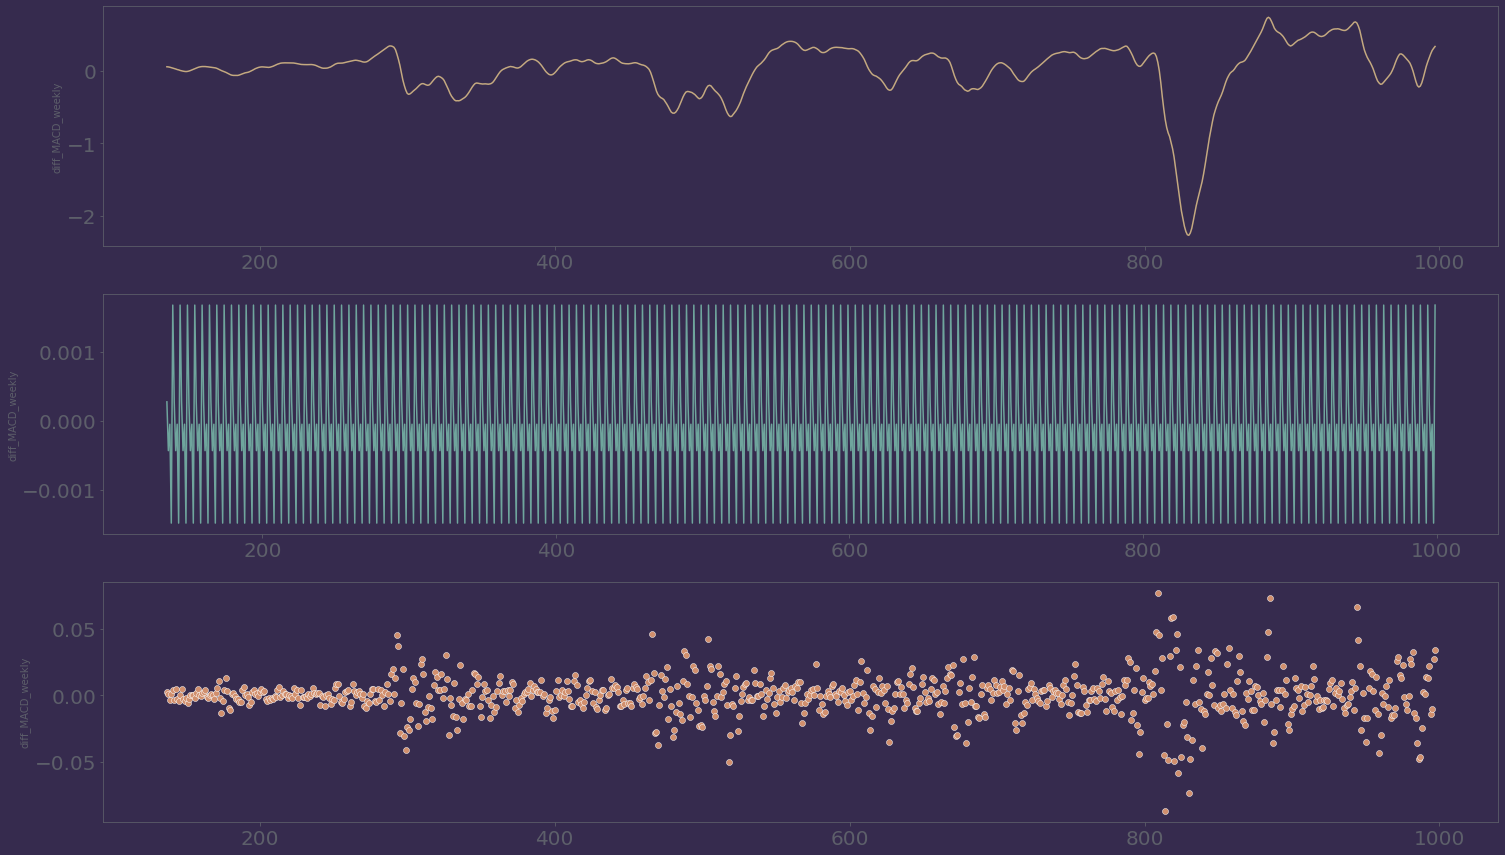

In [115]:
plot_seasonal_comp(df_seas_compon_diff_macd_weekly)

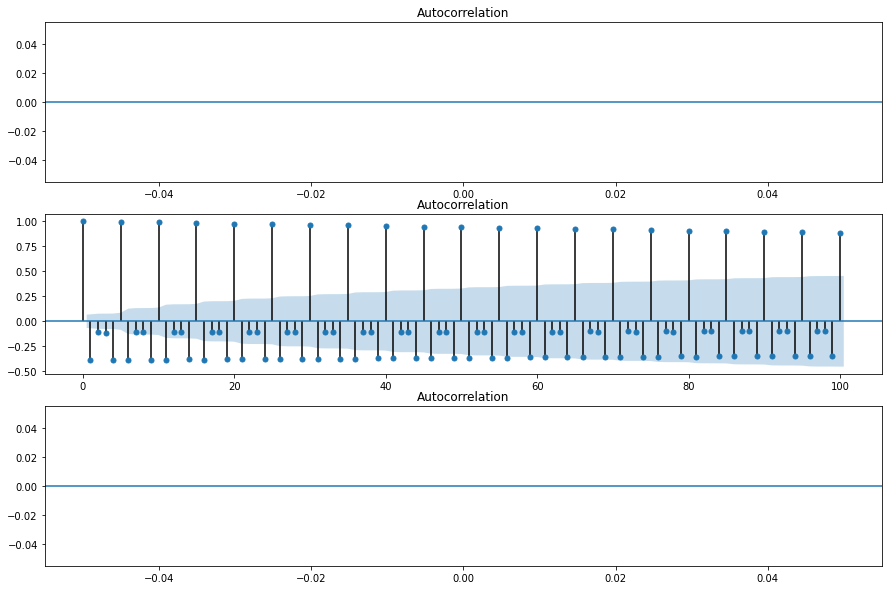

In [116]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_diff_macd_weekly.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_diff_macd_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_diff_macd_weekly.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

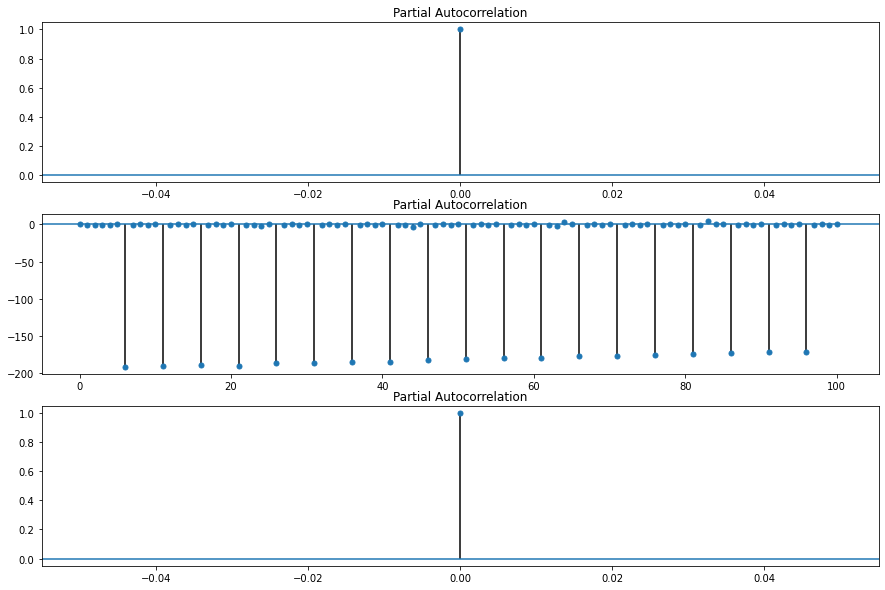

In [117]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_diff_macd_weekly.trend.values.squeeze(), lags=180, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_diff_macd_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_diff_macd_weekly.resid.values.squeeze(), lags=180, ax=ax[2])
plt.show()


## RSI 

In [118]:
df_seas_compon_rsi = seasonal_decompose(df_train['rsi'],\
                                    model='additive', freq = 15)

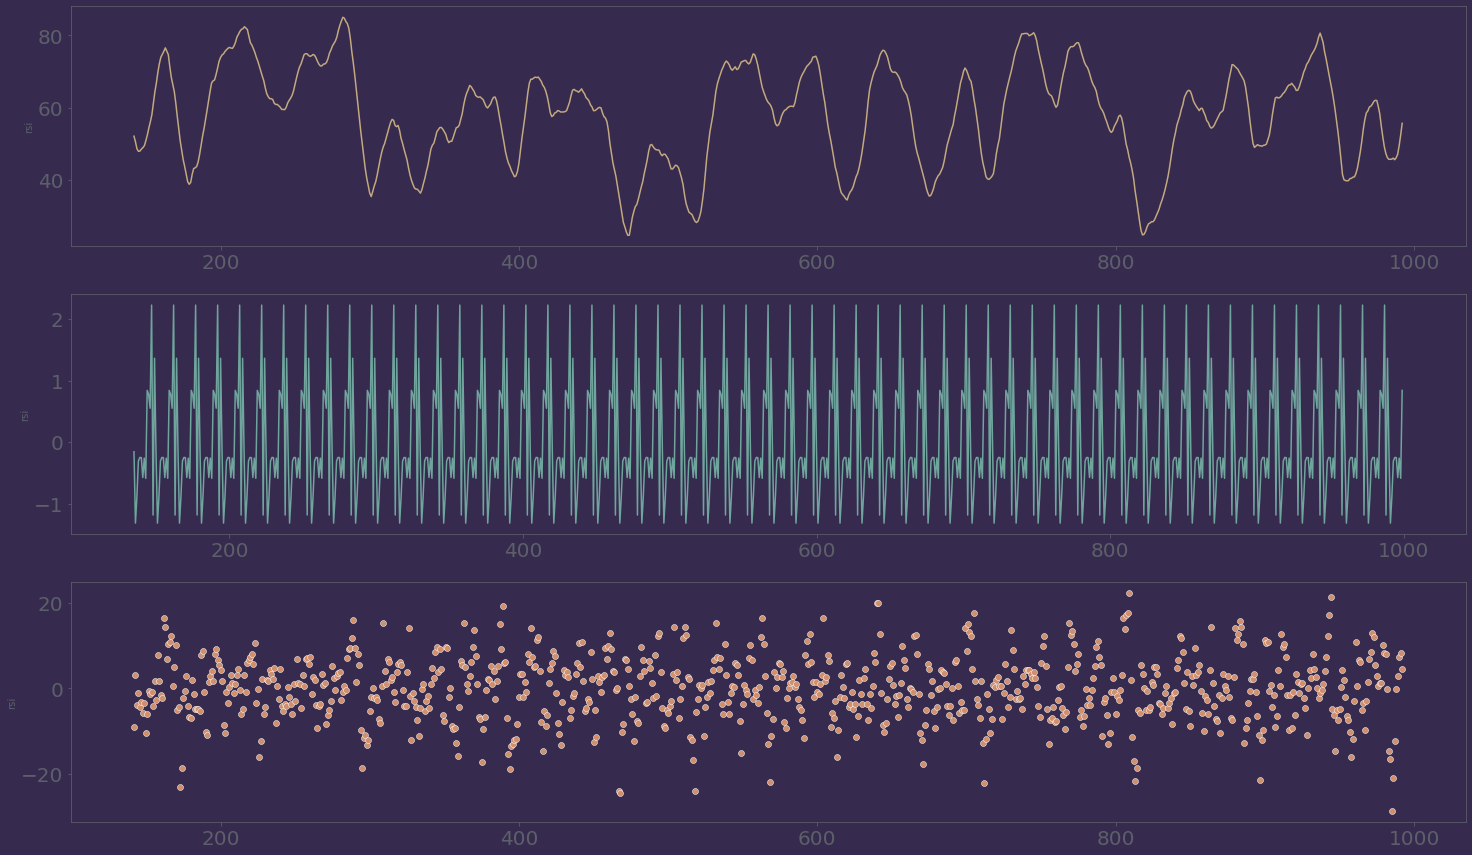

In [119]:
plot_seasonal_comp(df_seas_compon_rsi)

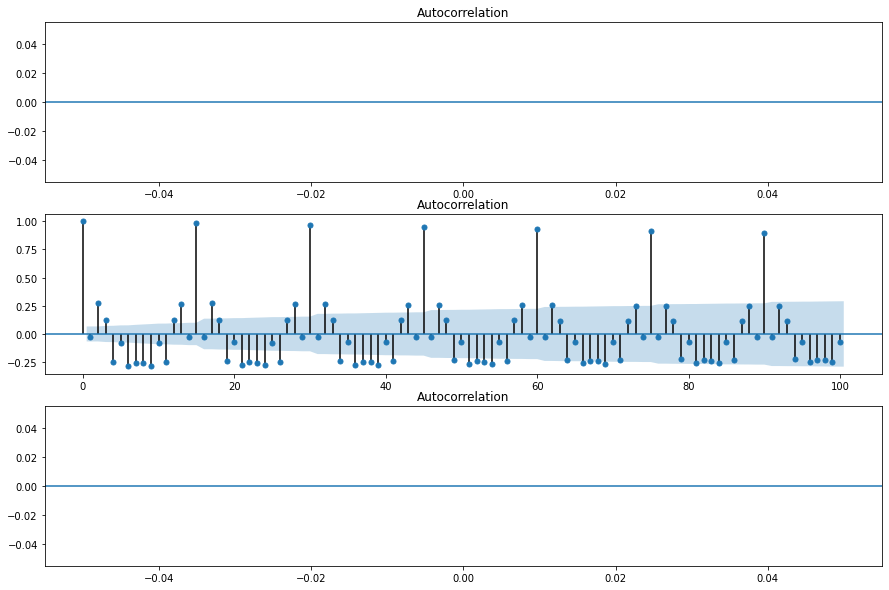

In [120]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_rsi.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_rsi.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_rsi.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

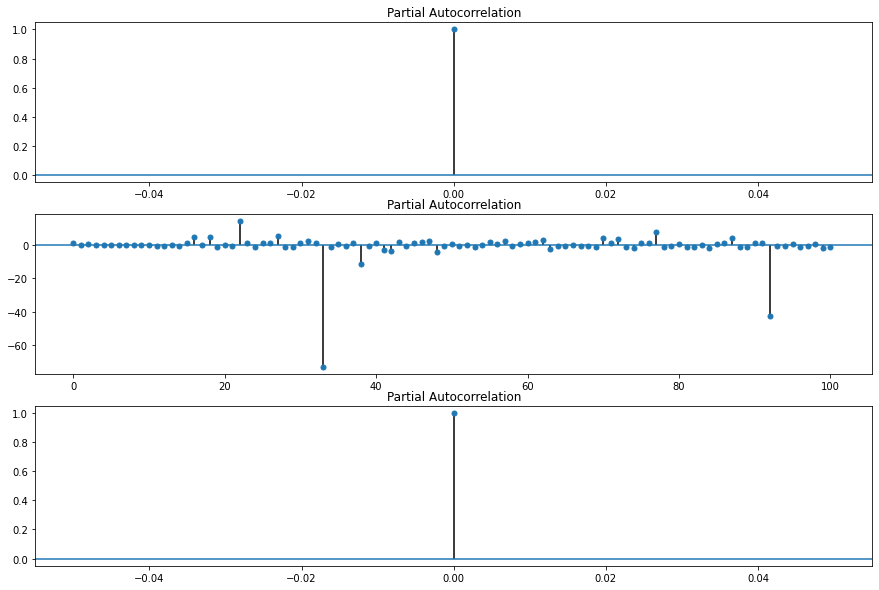

In [121]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_rsi.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_rsi.seasonal.values.squeeze(), lags=100, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_rsi.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

## Volume

In [122]:
df_seas_compon_macd_vol = seasonal_decompose(df_train['macd_vol'],\
                                    model='additive', freq = 5)

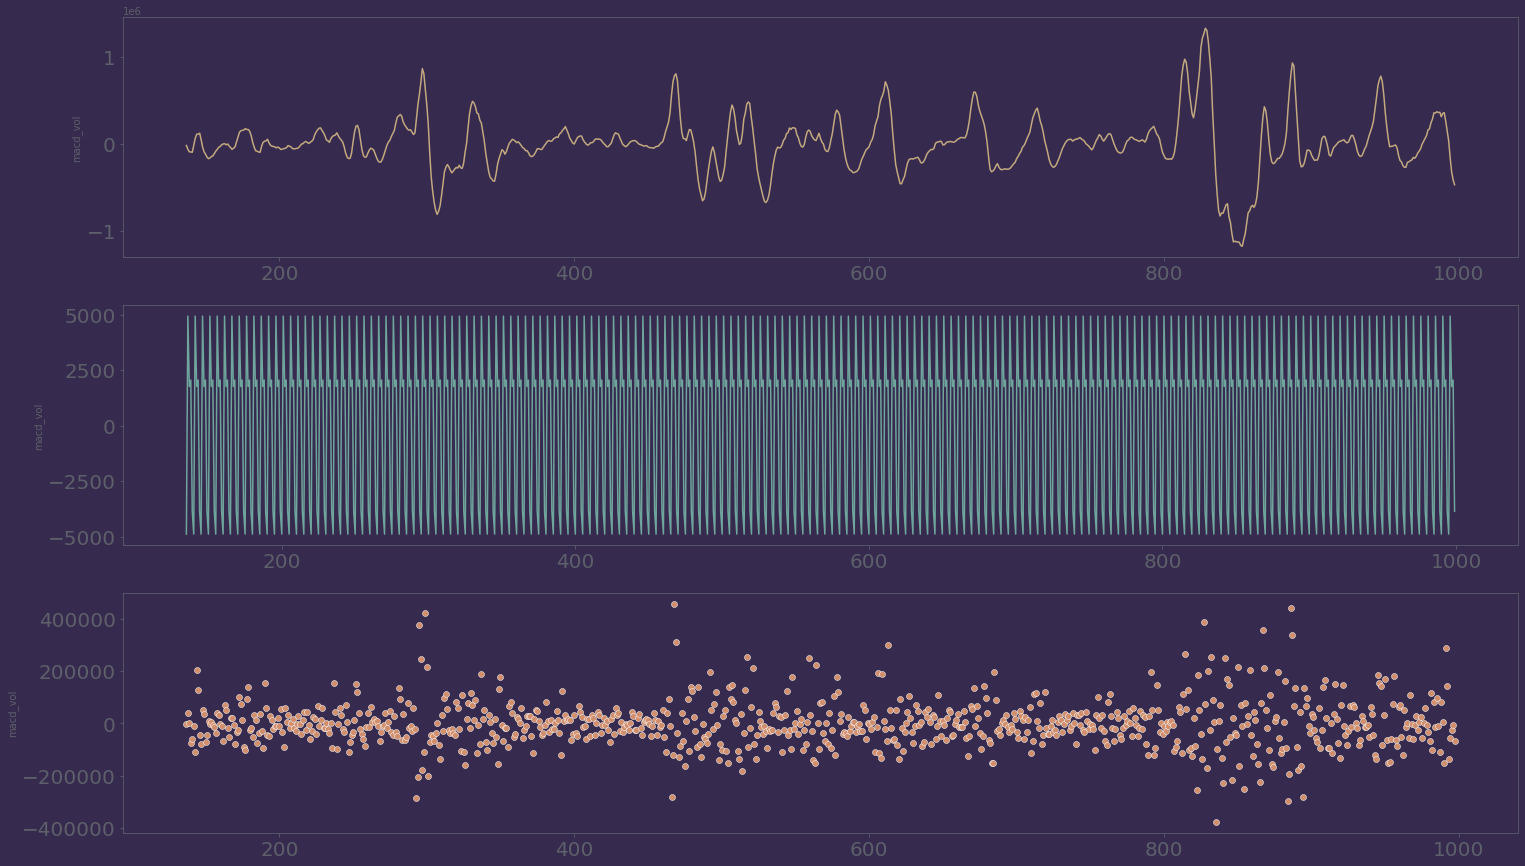

In [123]:
plot_seasonal_comp(df_seas_compon_macd_vol)

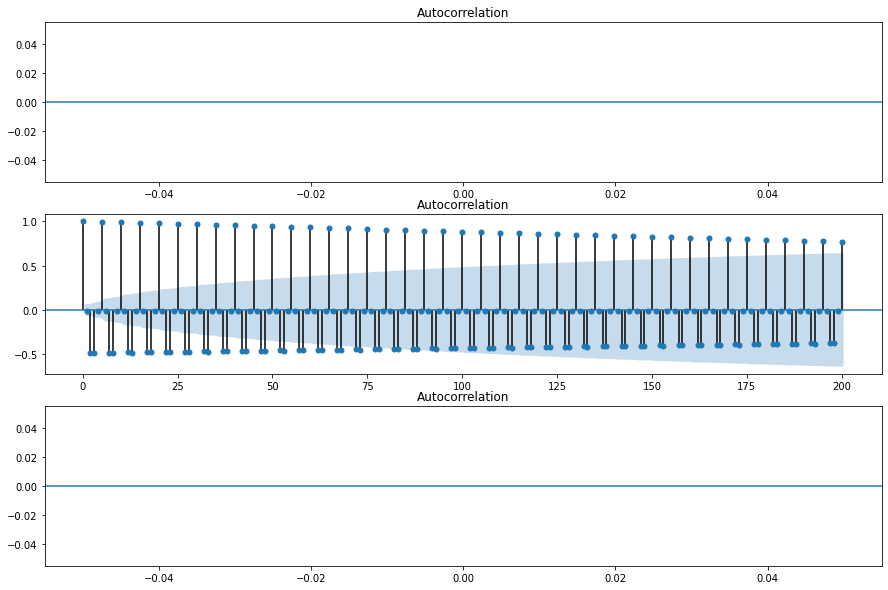

In [124]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_macd_vol.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_macd_vol.seasonal.values.squeeze(), lags=200, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_macd_vol.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

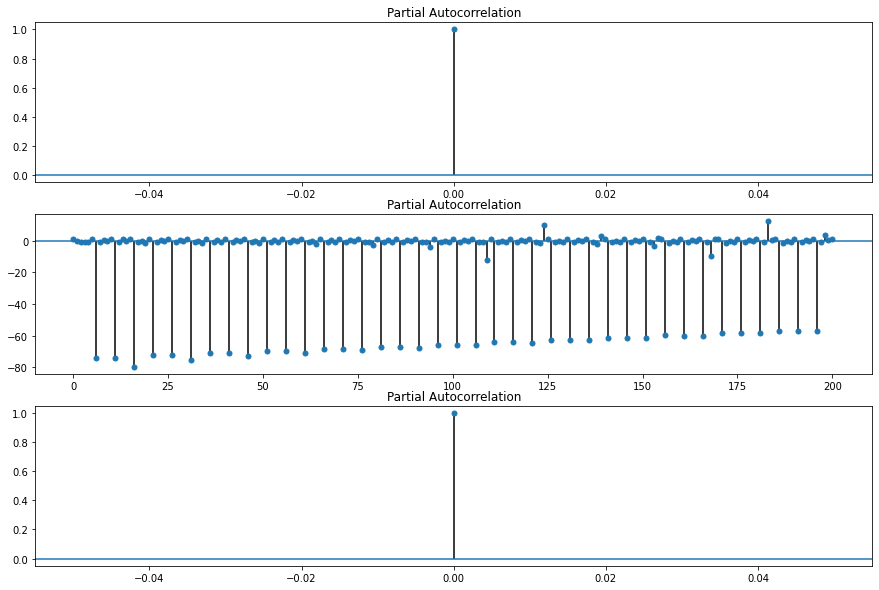

In [125]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_macd_vol.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_macd_vol.seasonal.values.squeeze(), lags=200, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_macd_vol.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

## Mass Index

In [126]:
df_seas_compon_massind = seasonal_decompose(df_train['massind'],\
                                    model='additive', freq = 5)

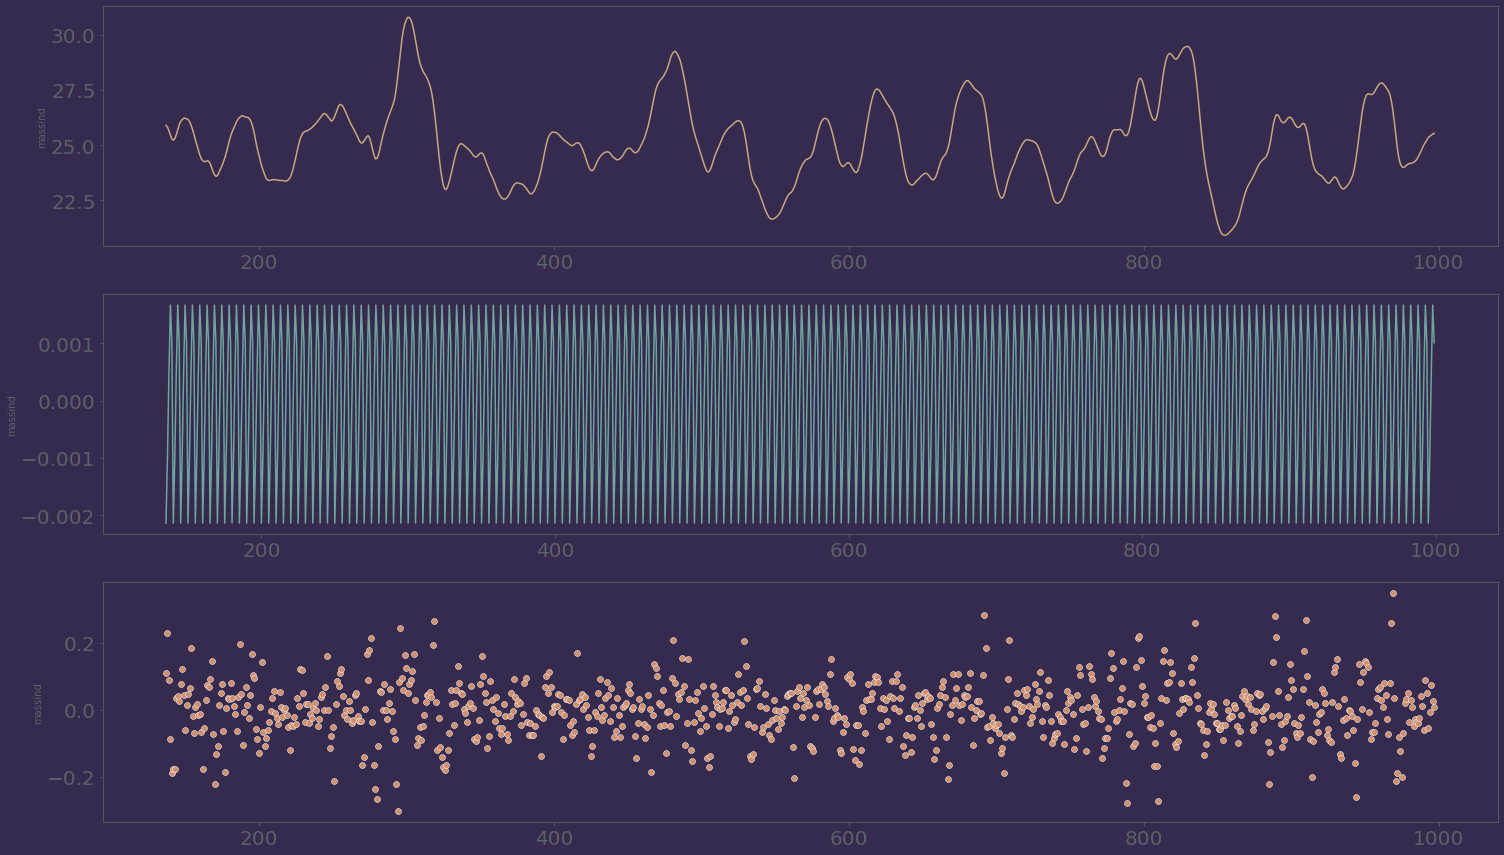

In [127]:
plot_seasonal_comp(df_seas_compon_massind)

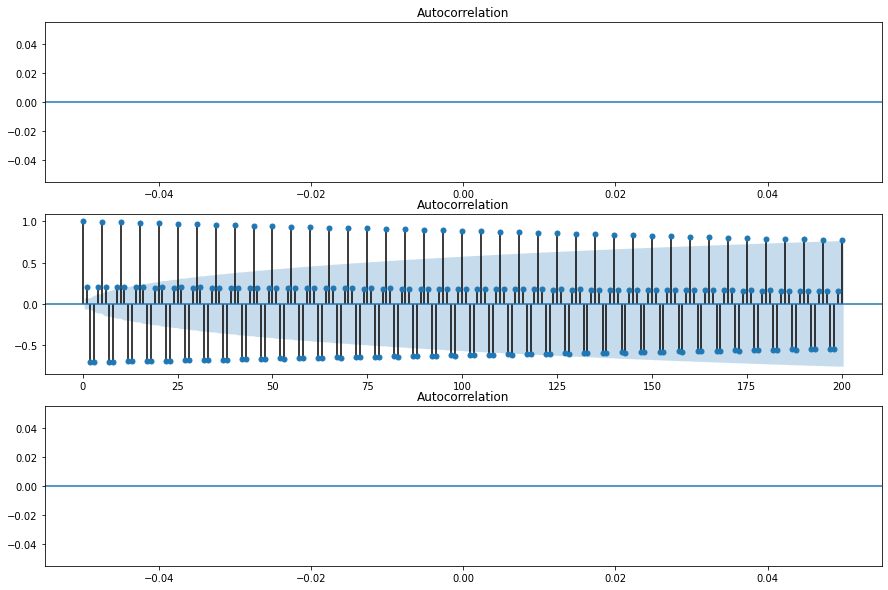

In [128]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_massind.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_massind.seasonal.values.squeeze(), lags=200, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_massind.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

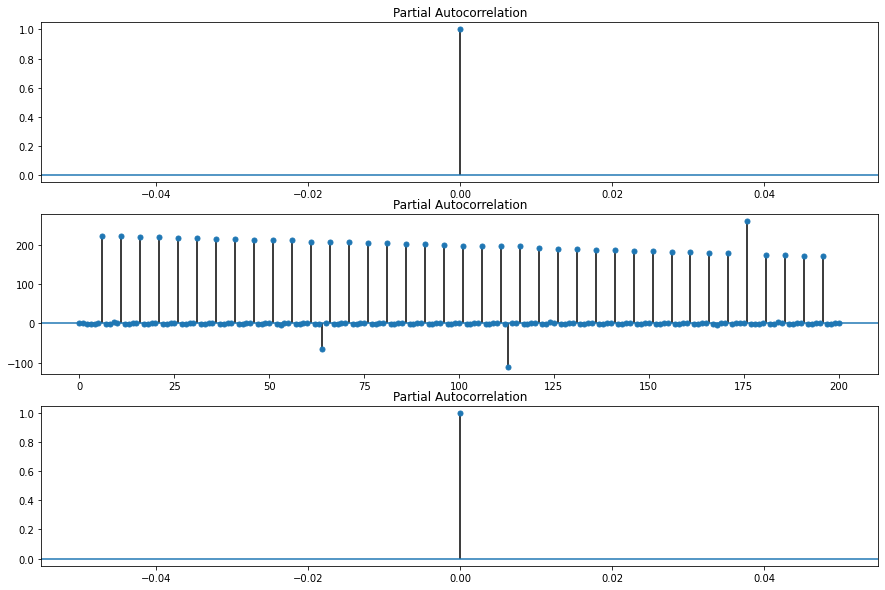

In [129]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_massind.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_massind.seasonal.values.squeeze(), lags=200, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_massind.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

## Money Flow Index

In [130]:
df_seas_compon_mf_index = seasonal_decompose(df_train['mf_index'],\
                                    model='additive', freq = 5)

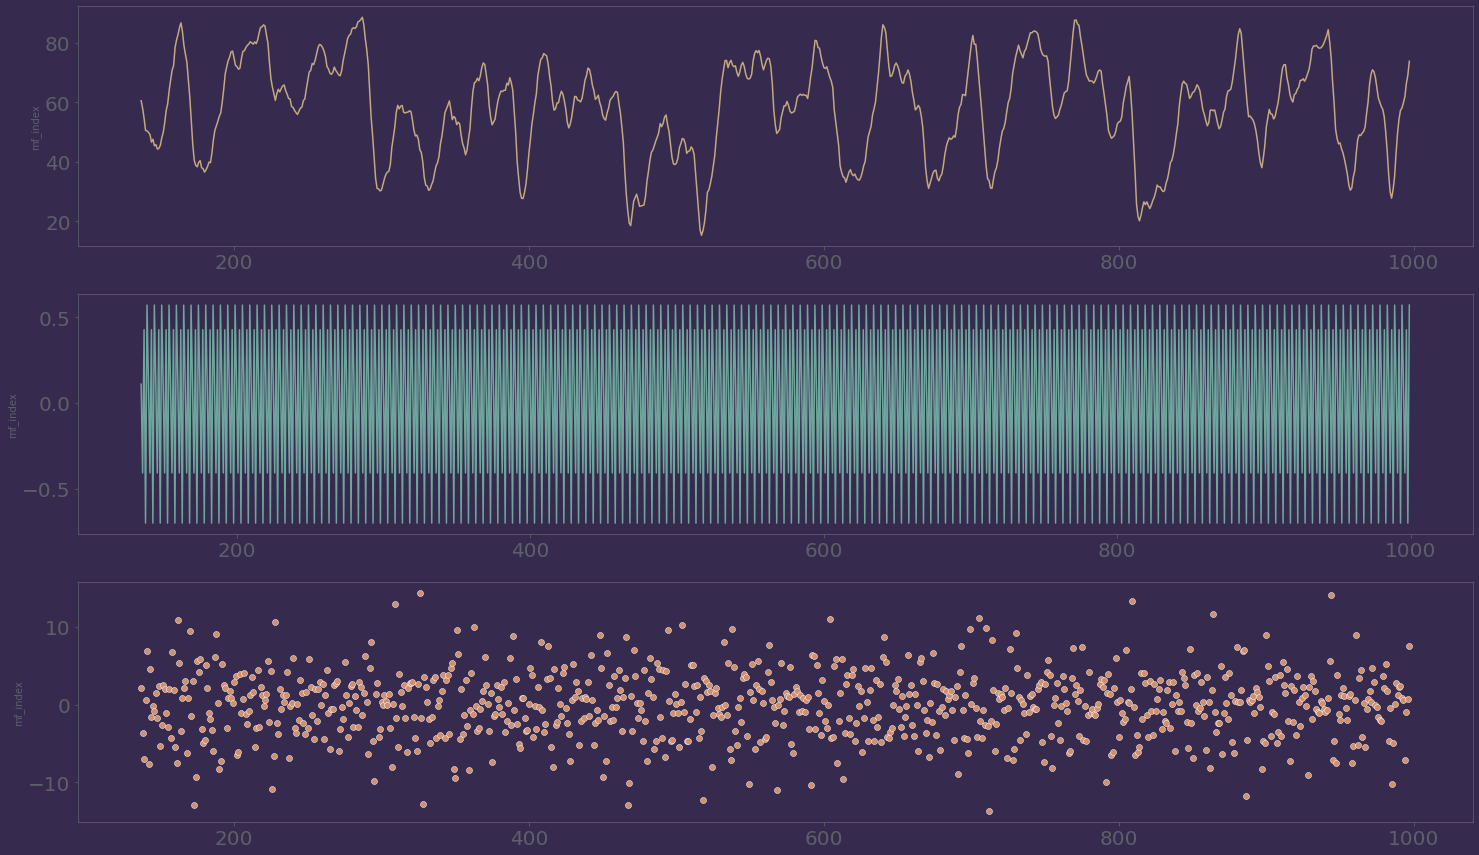

In [131]:
plot_seasonal_comp(df_seas_compon_mf_index)

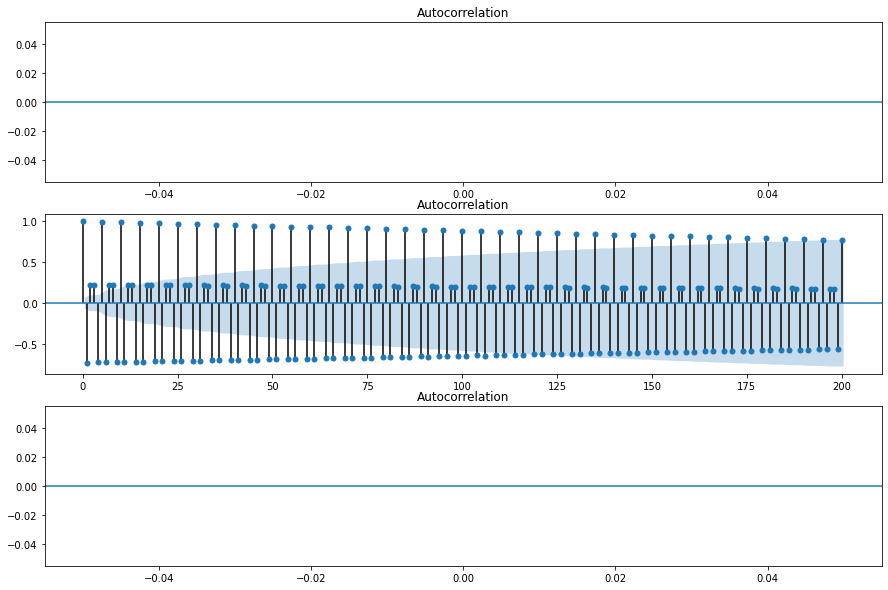

In [132]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_mf_index.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_acf(df_seas_compon_mf_index.seasonal.values.squeeze(), lags=200, ax=ax[1])
sm.graphics.tsa.plot_acf(df_seas_compon_mf_index.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

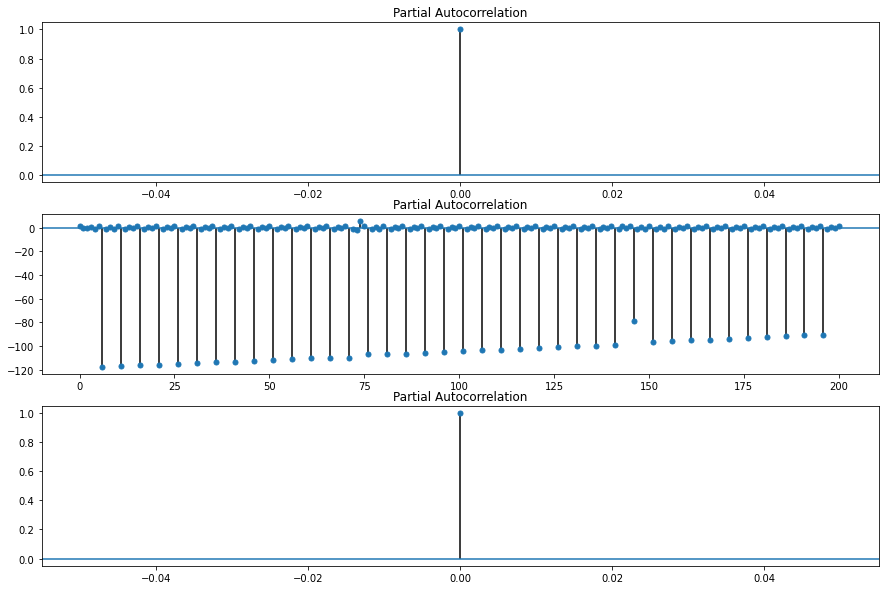

In [133]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_seas_compon_mf_index.trend.values.squeeze(), lags=200, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_seas_compon_mf_index.seasonal.values.squeeze(), lags=200, ax=ax[1])
sm.graphics.tsa.plot_pacf(df_seas_compon_mf_index.resid.values.squeeze(), lags=200, ax=ax[2])
plt.show()

# Feature Selection

In [ ]:
df_train.columns[420:490]

Index(['mf_index_15daysago', 'mf_index_16daysago', 'mf_index_19daysago',
       'mf_index_30daysago', 'mf_index_31daysago', 'mf_index_34daysago',
       'mf_index_35daysago', 'mf_index_36daysago', 'mf_index_39daysago',
       'mf_index_40daysago', 'mf_index_41daysago', 'mf_index_44daysago',
       'mf_index_45daysago', 'mf_index_46daysago', 'mf_index_49daysago',
       'mf_index_50daysago', 'mf_index_51daysago', 'mf_index_54daysago',
       'mf_index_55daysago', 'mf_index_56daysago', 'mf_index_59daysago',
       'mf_index_60daysago', 'ulcer_index_1daysago', 'ulcer_index_4daysago',
       'ulcer_index_5daysago', 'ulcer_index_6daysago', 'ulcer_index_9daysago',
       'ulcer_index_10daysago', 'ulcer_index_11daysago',
       'ulcer_index_14daysago', 'ulcer_index_15daysago',
       'ulcer_index_16daysago', 'ulcer_index_19daysago',
       'ulcer_index_30daysago', 'ulcer_index_31daysago',
       'ulcer_index_34daysago', 'ulcer_index_35daysago',
       'ulcer_index_36daysago', 'ulcer_index_39d

In [ ]:
features_fast_k = ['fast_k_1daysago',
        'fast_k_2daysago', 'fast_k_3daysago', 'fast_k_5daysago',
        'fast_k_7daysago', 'fast_k_8daysago', 'fast_k_10daysago',
        'fast_k_12daysago', 'fast_k_13daysago','fast_k_15daysago', 
        'fast_k_17daysago', 'fast_k_18daysago',
        'fast_k_20daysago', 'fast_k_22daysago', 'fast_k_23daysago',
        'fast_k_25daysago', 'fast_k_27daysago', 'fast_k_28daysago',
        'fast_k_30daysago', 'fast_k_32daysago', 'fast_k_33daysago',
        'fast_k_35daysago', 'fast_k_37daysago', 'fast_k_38daysago',
        'fast_k_40daysago', 'fast_k_42daysago', 'fast_k_43daysago',
        'fast_k_45daysago', 'fast_k_47daysago', 'fast_k_48daysago',
        'fast_k_50daysago', 'fast_k_52daysago', 'fast_k_53daysago',
        'fast_k_55daysago', 'fast_k_57daysago', 'fast_k_58daysago',
        'fast_k_60daysago']
features_fast_d=['fast_d_1daysago', 'fast_d_2daysago',
        'fast_d_3daysago', 'fast_d_5daysago', 'fast_d_7daysago',
        'fast_d_8daysago', 'fast_d_10daysago', 'fast_d_12daysago',
        'fast_d_13daysago', 'fast_d_15daysago', 'fast_d_17daysago',
        'fast_d_18daysago', 'fast_d_20daysago', 'fast_d_22daysago',
        'fast_d_23daysago', 'fast_d_25daysago', 'fast_d_27daysago',
        'fast_d_28daysago', 'fast_d_30daysago', 'fast_d_32daysago',
        'fast_d_33daysago', 'fast_d_35daysago', 'fast_d_37daysago',
        'fast_d_38daysago', 'fast_d_40daysago', 'fast_d_42daysago',
        'fast_d_43daysago', 'fast_d_45daysago', 'fast_d_47daysago',
        'fast_d_48daysago', 'fast_d_50daysago', 'fast_d_52daysago',
        'fast_d_53daysago', 'fast_d_55daysago', 'fast_d_57daysago',
        'fast_d_58daysago', 'fast_d_60daysago']
features_slow_k=[ 'slow_k_1daysago',
        'slow_k_2daysago', 'slow_k_3daysago', 'slow_k_5daysago',
        'slow_k_7daysago', 'slow_k_8daysago', 'slow_k_10daysago',
        'slow_k_12daysago', 'slow_k_13daysago', 'slow_k_15daysago',
        'slow_k_17daysago', 'slow_k_18daysago', 'slow_k_20daysago',
        'slow_k_22daysago', 'slow_k_23daysago', 'slow_k_25daysago',
        'slow_k_27daysago', 'slow_k_28daysago', 'slow_k_30daysago',
        'slow_k_32daysago', 'slow_k_33daysago', 'slow_k_35daysago',
        'slow_k_37daysago', 'slow_k_38daysago', 'slow_k_40daysago',
        'slow_k_42daysago', 'slow_k_43daysago', 'slow_k_45daysago',
        'slow_k_47daysago', 'slow_k_48daysago', 'slow_k_50daysago',
        'slow_k_52daysago', 'slow_k_53daysago', 'slow_k_55daysago',
        'slow_k_57daysago', 'slow_k_58daysago', 'slow_k_60daysago']
features_pct_change= [ 'close_pct_change_1daysago', 'close_pct_change_2daysago',
        'close_pct_change_4daysago', 'close_pct_change_5daysago',
        'close_pct_change_6daysago', 'close_pct_change_9daysago',
        'close_pct_change_10daysago', 'close_pct_change_11daysago',
        'close_pct_change_14daysago', 'close_pct_change_15daysago',
        'close_pct_change_16daysago', 'close_pct_change_19daysago',
        'close_pct_change_30daysago', 'close_pct_change_31daysago',
        'close_pct_change_34daysago', 'close_pct_change_35daysago',
        'close_pct_change_36daysago', 'close_pct_change_39daysago',
        'close_pct_change_40daysago', 'close_pct_change_41daysago',
        'close_pct_change_44daysago', 'close_pct_change_45daysago',
        'close_pct_change_46daysago', 'close_pct_change_49daysago',
        'close_pct_change_50daysago', 'close_pct_change_51daysago',
        'close_pct_change_54daysago', 'close_pct_change_55daysago',
        'close_pct_change_56daysago', 'close_pct_change_59daysago',
        'close_pct_change_60daysago']
features_diff_macd=[ 'diff_MACD_1daysago',
        'diff_MACD_4daysago', 'diff_MACD_5daysago', 'diff_MACD_6daysago',
        'diff_MACD_9daysago', 'diff_MACD_10daysago', 'diff_MACD_11daysago',
        'diff_MACD_14daysago', 'diff_MACD_15daysago', 'diff_MACD_16daysago',
        'diff_MACD_19daysago', 'diff_MACD_30daysago', 'diff_MACD_31daysago',
        'diff_MACD_34daysago', 'diff_MACD_35daysago', 'diff_MACD_36daysago',
        'diff_MACD_39daysago', 'diff_MACD_40daysago', 'diff_MACD_41daysago',
        'diff_MACD_44daysago', 'diff_MACD_45daysago', 'diff_MACD_46daysago',
        'diff_MACD_49daysago', 'diff_MACD_50daysago', 'diff_MACD_51daysago',
        'diff_MACD_54daysago', 'diff_MACD_55daysago', 'diff_MACD_56daysago',
        'diff_MACD_59daysago', 'diff_MACD_60daysago', ]
features_rsi=['rsi_1daysago',
        'rsi_2daysago', 'rsi_3daysago', 'rsi_5daysago', 'rsi_7daysago',
        'rsi_8daysago', 'rsi_10daysago', 'rsi_12daysago', 'rsi_13daysago',
        'rsi_15daysago', 'rsi_17daysago', 'rsi_18daysago', 'rsi_20daysago',
        'rsi_22daysago', 'rsi_23daysago', 'rsi_25daysago', 'rsi_27daysago',
        'rsi_28daysago', 'rsi_30daysago', 'rsi_32daysago', 'rsi_33daysago',
       'rsi_35daysago', 'rsi_37daysago', 'rsi_38daysago', 'rsi_40daysago',
       'rsi_42daysago', 'rsi_43daysago', 'rsi_45daysago', 'rsi_47daysago',
       'rsi_48daysago', 'rsi_50daysago', 'rsi_52daysago', 'rsi_53daysago',
       'rsi_55daysago', 'rsi_57daysago', 'rsi_58daysago', 'rsi_60daysago']
features_ema = ['ema_12_1daysago', 'ema_12_2daysago',
        'ema_12_3daysago', 'ema_12_4daysago', 'ema_12_5daysago',
        'ema_12_6daysago', 'ema_12_7daysago', 'ema_12_8daysago',
        'ema_12_9daysago', 'ema_12_10daysago', 'ema_12_11daysago',
        'ema_12_12daysago', 'ema_12_13daysago', 'ema_12_14daysago',
        'ema_12_15daysago', 'ema_26_1daysago', 'ema_26_2daysago',
        'ema_26_3daysago', 'ema_26_4daysago', 'ema_26_5daysago',
        'ema_26_6daysago', 'ema_26_7daysago', 'ema_26_8daysago',
        'ema_26_9daysago', 'ema_26_10daysago', 'ema_26_11daysago',
        'ema_26_12daysago', 'ema_26_13daysago', 'ema_26_14daysago',
        'ema_26_15daysago']
features_fast_k_weekly = [        'fast_k_weekly_1daysago', 'fast_k_weekly_6daysago',
        'fast_k_weekly_11daysago', 'fast_k_weekly_16daysago',
        'fast_k_weekly_18daysago', 'fast_k_weekly_21daysago',
        'fast_k_weekly_26daysago', 'fast_k_weekly_31daysago',
        'fast_k_weekly_36daysago', 'fast_k_weekly_41daysago',
        'fast_k_weekly_46daysago', 'fast_k_weekly_51daysago',
        'fast_k_weekly_56daysago']
features_fast_d_weekly = ['fast_d_weekly_1daysago',
        'fast_d_weekly_6daysago', 'fast_d_weekly_11daysago',
        'fast_d_weekly_16daysago', 'fast_d_weekly_18daysago',
        'fast_d_weekly_21daysago', 'fast_d_weekly_26daysago',
        'fast_d_weekly_31daysago', 'fast_d_weekly_36daysago',
        'fast_d_weekly_41daysago', 'fast_d_weekly_46daysago',
        'fast_d_weekly_51daysago', 'fast_d_weekly_56daysago']
features_diff_macd_weekly =['diff_MACD_weekly_1daysago', 'diff_MACD_weekly_6daysago',
        'diff_MACD_weekly_11daysago', 'diff_MACD_weekly_16daysago',
        'diff_MACD_weekly_18daysago', 'diff_MACD_weekly_21daysago',
        'diff_MACD_weekly_26daysago', 'diff_MACD_weekly_31daysago',
        'diff_MACD_weekly_36daysago', 'diff_MACD_weekly_41daysago',
        'diff_MACD_weekly_46daysago', 'diff_MACD_weekly_51daysago',
        'diff_MACD_weekly_56daysago']
features_macd_vol = [ 'macd_vol_1daysago', 'macd_vol_4daysago',
        'macd_vol_5daysago', 'macd_vol_6daysago', 'macd_vol_9daysago',
        'macd_vol_10daysago', 'macd_vol_11daysago', 'macd_vol_14daysago',
        'macd_vol_15daysago', 'macd_vol_16daysago', 'macd_vol_19daysago',
        'macd_vol_30daysago', 'macd_vol_31daysago', 'macd_vol_34daysago',
        'macd_vol_35daysago', 'macd_vol_36daysago', 'macd_vol_39daysago',
        'macd_vol_40daysago', 'macd_vol_41daysago', 'macd_vol_44daysago',
        'macd_vol_45daysago', 'macd_vol_46daysago', 'macd_vol_49daysago',
        'macd_vol_50daysago', 'macd_vol_51daysago', 'macd_vol_54daysago',
        'macd_vol_55daysago', 'macd_vol_56daysago', 'macd_vol_59daysago',
        'macd_vol_60daysago', ]
features_massind = ['massind_2daysago', 'massind_3daysago', 'massind_5daysago',
       'massind_7daysago', 'massind_8daysago', 'massind_10daysago',
       'massind_12daysago', 'massind_13daysago', 'massind_15daysago',
       'massind_17daysago', 'massind_18daysago', 'massind_20daysago',
       'massind_22daysago', 'massind_23daysago', 'massind_25daysago',
       'massind_27daysago', 'massind_28daysago', 'massind_30daysago',
       'massind_32daysago', 'massind_33daysago', 'massind_35daysago',
       'massind_37daysago', 'massind_38daysago', 'massind_40daysago',
       'massind_42daysago', 'massind_43daysago', 'massind_45daysago',
       'massind_47daysago', 'massind_48daysago', 'massind_50daysago',
       'massind_52daysago', 'massind_53daysago', 'massind_55daysago',
       'massind_57daysago', 'massind_58daysago', 'massind_60daysago']
features_mf_index = ['mf_index_4daysago', 'mf_index_5daysago', 'mf_index_6daysago',
       'mf_index_9daysago', 'mf_index_10daysago', 'mf_index_11daysago',
       'mf_index_14daysago', 'mf_index_15daysago', 'mf_index_16daysago',
       'mf_index_19daysago', 'mf_index_30daysago', 'mf_index_31daysago',
       'mf_index_34daysago', 'mf_index_35daysago', 'mf_index_36daysago',
       'mf_index_39daysago', 'mf_index_40daysago', 'mf_index_41daysago',
       'mf_index_44daysago', 'mf_index_45daysago', 'mf_index_46daysago',
       'mf_index_49daysago', 'mf_index_50daysago', 'mf_index_51daysago',
       'mf_index_54daysago', 'mf_index_55daysago', 'mf_index_56daysago',
       'mf_index_59daysago', 'mf_index_60daysago']
        

# Target Selection

In [ ]:
target_fast_k = ['fast_k'] 
target_fast_k_1daysfuture =  ['fast_k_-1daysago']
target_macd = ['diff_MACD']
target_rsi = ['rsi']

## Input Output -  Train, Test

In [ ]:
print(f'shape of fast_k feats {len(features_fast_k)}')
print(f'shape of fast_d feats {len(features_fast_d)}')
print(f'shape of slow_k feats {len(features_slow_k)}')
print(f'shape of pct_change feats {len(features_pct_change)}')
print(f'shape of diff_macd feats {len(features_diff_macd)}')
print(f'shape of rsi feats {len(features_rsi)}')
print(f'shape of ema feats {len(features_ema)}')
print(f'shape of fast_k_weekly feats {len(features_fast_k_weekly)}')
print(f'shape of fast_d_weekly feats {len(features_fast_d_weekly)}')
print(f'shape of macd_weekly feats {len(features_diff_macd_weekly)}')
print(f'shape of macd_vol feats {len(features_macd_vol)}')
print(f'shape of massind feats {len(features_massind)}')
print(f'shape of mf_index feats {len(features_mf_index)}')

shape of fast_k feats 37
shape of fast_d feats 37
shape of slow_k feats 37
shape of pct_change feats 31
shape of diff_macd feats 30
shape of rsi feats 37
shape of ema feats 30
shape of fast_k_weekly feats 13
shape of fast_d_weekly feats 13
shape of macd_weekly feats 13
shape of macd_vol feats 30
shape of massind feats 36
shape of mf_index feats 29
shape of ulcer_index feats 30


In [ ]:
# outputs
output_fast_k_train = df_train[target_fast_k]
output_fast_k_test = df_test[target_fast_k]

output_fast_k_tomorrow_train = df_train[target_fast_k_1daysfuture]
output_fast_k_tomorrow_test = df_test[target_fast_k_1daysfuture]

output_macd_train = df_train[target_macd] / df_train[target_macd].max()
output_macd_test = df_test[target_macd] / df_train[target_macd].max()

output_rsi_train = df_train[target_rsi] / 100
output_rsi_test = df_test[target_rsi] / 100



# inputs
input_fast_k_train = df_train[features_fast_k]
input_fast_k_test = df_test[features_fast_k]

input_fast_d_train = df_train[features_fast_d]
input_fast_d_test = df_test[features_fast_d]

input_slow_k_train = df_train[features_slow_k]
input_slow_k_test = df_test[features_slow_k]

input_pct_change_train = df_train[features_pct_change]
input_pct_change_test = df_test[features_pct_change]

input_diff_macd_train = df_train[features_diff_macd]
input_diff_macd_test = df_test[features_diff_macd]

input_fast_k_weekly_train = df_train[features_fast_k_weekly]
input_fast_k_weekly_test = df_test[features_fast_k_weekly]

input_fast_d_weekly_train = df_train[features_fast_d_weekly]
input_fast_d_weekly_test = df_test[features_fast_d_weekly]

input_diff_macd_weekly_train = df_train[features_diff_macd_weekly]
input_diff_macd_weekly_test = df_test[features_diff_macd_weekly]

input_rsi_train = df_train[features_rsi]
input_rsi_test = df_test[features_rsi]

input_macd_vol_train = df_train[features_macd_vol]
input_macd_vol_test = df_test[features_macd_vol]

input_massind_train = df_train[features_massind]
input_massind_test = df_test[features_massind]

input_mf_index_train = df_train[features_mf_index]
input_mf_index_test = df_test[features_mf_index]


## Standardize

In [ ]:
std_scaler = StandardScaler()
input_fast_k_train = std_scaler.fit_transform(input_fast_k_train)
input_fast_k_test = std_scaler.transform(input_fast_k_test)

input_fast_d_train = std_scaler.fit_transform(input_fast_d_train)
input_fast_d_test = std_scaler.transform(input_fast_d_test)

input_slow_k_train = std_scaler.fit_transform(input_slow_k_train)
input_slow_k_test = std_scaler.transform(input_slow_k_test)

input_pct_change_train = std_scaler.fit_transform(input_pct_change_train)
input_pct_change_test = std_scaler.transform(input_pct_change_test)

input_diff_macd_train = std_scaler.fit_transform(input_diff_macd_train)
input_diff_macd_test = std_scaler.transform(input_diff_macd_test)

input_fast_k_weekly_train = std_scaler.fit_transform(input_fast_k_weekly_train)
input_fast_k_weekly_test = std_scaler.transform(input_fast_k_weekly_test)

input_fast_d_weekly_train = std_scaler.fit_transform(input_fast_d_weekly_train)
input_fast_d_weekly_test = std_scaler.transform(input_fast_d_weekly_test)

input_diff_macd_weekly_train = std_scaler.fit_transform(input_diff_macd_weekly_train)
input_diff_macd_weekly_test = std_scaler.transform(input_diff_macd_weekly_test)

input_rsi_train = std_scaler.fit_transform(input_rsi_train)
input_rsi_test = std_scaler.transform(input_rsi_test)

input_macd_vol_train = std_scaler.fit_transform(input_macd_vol_train)
input_macd_vol_test = std_scaler.transform(input_macd_vol_test)

input_massind_train = std_scaler.fit_transform(input_massind_train)
input_massind_test = std_scaler.transform(input_massind_test)

input_mf_index_train = std_scaler.fit_transform(input_mf_index_train)
input_mf_index_test = std_scaler.transform(input_mf_index_test)

## Principal Components

In [ ]:
pca = PCA( svd_solver='full') 
input_fast_k_train = pca.fit_transform(input_fast_k_train)
input_fast_k_test = pca.transform(input_fast_k_test)

input_fast_d_train = pca.fit_transform(input_fast_d_train)
input_fast_d_test = pca.transform(input_fast_d_test)

input_slow_k_train = pca.fit_transform(input_slow_k_train)
input_slow_k_test = pca.transform(input_slow_k_test)

input_pct_change_train = pca.fit_transform(input_pct_change_train)
input_pct_change_test = pca.transform(input_pct_change_test)

input_diff_macd_train = pca.fit_transform(input_diff_macd_train)
input_diff_macd_test = pca.transform(input_diff_macd_test)

input_fast_k_weekly_train = pca.fit_transform(input_fast_k_weekly_train)
input_fast_k_weekly_test = pca.transform(input_fast_k_weekly_test)

input_fast_d_weekly_train = pca.fit_transform(input_fast_d_weekly_train)
input_fast_d_weekly_test = pca.transform(input_fast_d_weekly_test)

input_diff_macd_weekly_train = pca.fit_transform(input_diff_macd_weekly_train)
input_diff_macd_weekly_test = pca.transform(input_diff_macd_weekly_test)

input_rsi_train = pca.fit_transform(input_rsi_train)
input_rsi_test = pca.transform(input_rsi_test)

input_macd_vol_train = pca.fit_transform(input_macd_vol_train)
input_macd_vol_test = pca.transform(input_macd_vol_test)

input_massind_train = pca.fit_transform(input_massind_train)
input_massind_test = pca.transform(input_massind_test)

input_mf_index_train = pca.fit_transform(input_mf_index_train)
input_mf_index_test = pca.transform(input_mf_index_test)

# Modeling

## Inputs

In [ ]:
input_fast_k = tf.keras.layers.Input(shape=(len(features_fast_k),1), name='fast_k')
input_fast_d = tf.keras.layers.Input(shape=(len(features_fast_d),1), name='fast_d')
input_slow_k = tf.keras.layers.Input(shape=(len(features_slow_k),1), name='slow_k')
input_pct_change = tf.keras.layers.Input(shape=(len(features_pct_change),1), name='pct_change')
input_fast_k_weekly = tf.keras.layers.Input(shape=(len(features_fast_k_weekly),1), name='fast_k_weekly')
input_fast_d_weekly = tf.keras.layers.Input(shape=(len(features_fast_d_weekly),1), name='fast_d_weekly')
input_diff_macd = tf.keras.layers.Input(shape=(len(features_diff_macd),1), name='diff_macd')
input_diff_macd_weekly = tf.keras.layers.Input(shape=(len(features_diff_macd_weekly),1), name='diff_macd_weekly')
input_rsi = tf.keras.layers.Input(shape=(len(features_rsi),1), name='rsi')
input_macd_vol= tf.keras.layers.Input(shape=(len(features_macd_vol),1), name='macd_vol')
input_massind = tf.keras.layers.Input(shape=(len(features_massind),1), name='massind')
input_mf_index = tf.keras.layers.Input(shape=(len(features_mf_index),1), name='mf_index')

# Model Variables

In [ ]:
chnl_act = 'elu'

dp = .4 #.5

# Channels

In [ ]:
srnn1 = 32
db2 = 23
db3 = 37
db4 = 21
db5 = 29
db6 = 6 



### fast_k

In [ ]:
fast_k_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_fast_k)
fast_k_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(fast_k_srnn1)
fast_k_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(fast_k_db2)
fast_k_db3 = tf.keras.layers.Dropout(dp)(fast_k_db3)
fast_k_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(fast_k_db3)
fast_k_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(fast_k_db4)
fast_k_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(fast_k_db5)

### fast_d

In [ ]:
fast_d_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_fast_d)
fast_d_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(fast_d_srnn1)
fast_d_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(fast_d_db2)
fast_d_db3 = tf.keras.layers.Dropout(dp)(fast_d_db3)
fast_d_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(fast_d_db3)
fast_d_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(fast_d_db4)
fast_d_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(fast_d_db5)

### slow_k

In [ ]:
slow_k_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_slow_k)
slow_k_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(slow_k_srnn1)
slow_k_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(slow_k_db2)
slow_k_db3 = tf.keras.layers.Dropout(dp)(slow_k_db3)
slow_k_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(slow_k_db3)
slow_k_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(slow_k_db4)
slow_k_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(slow_k_db5)

### pct_change

In [ ]:
pct_change_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_pct_change)
pct_change_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(pct_change_srnn1)
pct_change_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(pct_change_db2)
pct_change_db3 = tf.keras.layers.Dropout(dp)(pct_change_db3)
pct_change_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(pct_change_db3)
pct_change_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(pct_change_db4)
pct_change_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(pct_change_db5)

### fast_k_weekly

In [ ]:
fast_k_weekly_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_fast_k_weekly)
fast_k_weekly_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(fast_k_weekly_srnn1)
fast_k_weekly_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(fast_k_weekly_db2)
fast_k_weekly_db3 = tf.keras.layers.Dropout(dp)(fast_k_weekly_db3)
fast_k_weekly_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(fast_k_weekly_db3)
fast_k_weekly_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(fast_k_weekly_db4)
fast_k_weekly_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(fast_k_weekly_db5)

### fast_d_weekly

In [ ]:
fast_d_weekly_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_fast_d_weekly)
fast_d_weekly_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(fast_d_weekly_srnn1)
fast_d_weekly_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(fast_d_weekly_db2)
fast_d_weekly_db3 = tf.keras.layers.Dropout(dp)(fast_d_weekly_db3)
fast_d_weekly_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(fast_d_weekly_db3)
fast_d_weekly_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(fast_d_weekly_db4)
fast_d_weekly_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(fast_d_weekly_db5)

### diff_macd

In [ ]:
diff_macd_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_diff_macd)
diff_macd_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(diff_macd_srnn1)
diff_macd_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(diff_macd_db2)
diff_macd_db3 = tf.keras.layers.Dropout(dp)(diff_macd_db3)
diff_macd_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(diff_macd_db3)
diff_macd_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(diff_macd_db4)
diff_macd_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(diff_macd_db5)

### diff_macd_weekly

In [ ]:
diff_macd_weekly_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_diff_macd_weekly)
diff_macd_weekly_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(diff_macd_weekly_srnn1)
diff_macd_weekly_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(diff_macd_weekly_db2)
diff_macd_weekly_db3 = tf.keras.layers.Dropout(dp)(diff_macd_weekly_db3)
diff_macd_weekly_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(diff_macd_weekly_db3)
diff_macd_weekly_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(diff_macd_weekly_db4)
diff_macd_weekly_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(diff_macd_weekly_db5)

### rsi

In [ ]:
rsi_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_rsi)
rsi_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(rsi_srnn1)
rsi_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(rsi_db2)
rsi_db3 = tf.keras.layers.Dropout(dp)(rsi_db3)
rsi_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(rsi_db3)
rsi_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(rsi_db4)
rsi_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(rsi_db5)

### macd_vol

In [ ]:
macd_vol_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_macd_vol)
macd_vol_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(macd_vol_srnn1)
macd_vol_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(macd_vol_db2)
macd_vol_db3 = tf.keras.layers.Dropout(dp)(macd_vol_db3)
macd_vol_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(macd_vol_db3)
macd_vol_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(macd_vol_db4)
macd_vol_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(macd_vol_db5)

## massind

In [ ]:
massind_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_massind)
massind_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(massind_srnn1)
massind_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(massind_db2)
massind_db3 = tf.keras.layers.Dropout(dp)(massind_db3)
massind_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(massind_db3)
massind_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(massind_db4)
massind_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(massind_db5)

## mf_index

Money Flow Index

In [ ]:
mf_index_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(input_mf_index)
mf_index_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(mf_index_srnn1)
mf_index_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(mf_index_db2)
mf_index_db3 = tf.keras.layers.Dropout(dp)(mf_index_db3)
mf_index_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(mf_index_db3)
mf_index_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(mf_index_db4)
mf_index_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(mf_index_db5)

# Network Head

## Concat

In [ ]:
list_channels = [fast_k_db6, fast_d_db6, slow_k_db6,
                  pct_change_db6, fast_k_weekly_db6, fast_d_weekly_db6,
                  diff_macd_db6, diff_macd_weekly_db6, rsi_db6,
                  macd_vol_db6,massind_db6, mf_index_db6
                 ]

In [ ]:
num_chans = len(list_channels)

In [ ]:
concat = tf.keras.layers.Concatenate()(list_channels) 

## Head

In [ ]:
head_srnn1 = 27
head_db2 = 14
head_db3 = 24
head_db4 = 20
head_db5 = 13 #13
head_db6 = 22 #22

In [ ]:
neck = tf.keras.layers.Reshape(target_shape=(num_chans * db6, 1))(concat)
head_srnn1 = tf.keras.layers.SimpleRNN(srnn1, activation=chnl_act)(neck)
head_db2 = tf.keras.layers.Dense(db2, activation=chnl_act)(head_srnn1)
head_db3 = tf.keras.layers.Dense(db3, activation=chnl_act)(head_db2)
head_db3 = tf.keras.layers.Dropout(dp)(head_db3)
head_db4 = tf.keras.layers.Dense(db4, activation=chnl_act)(head_db3)
head_db5 = tf.keras.layers.Dense(db5, activation=chnl_act)(head_db4)
head_db6 = tf.keras.layers.Dense(db6, activation=chnl_act)(head_db5)

# outputs

In [ ]:
output1 = 21
output2 = 11
output3 = 17
output4 = 1
dp =.26

In [ ]:
output_fast_k = tf.keras.layers.Dense(output1)(head_db6)
output_fast_k = tf.keras.layers.Dense(output2)(output_fast_k)
output_fast_k = tf.keras.layers.Dropout(dp)(output_fast_k)
output_fast_k = tf.keras.layers.Dense(output3)(output_fast_k)
output_fast_k = tf.keras.layers.Dense(output4, name='pred_fast_k')(output_fast_k)

output_fast_k_tomorrow = tf.keras.layers.Dense(output1)(head_db6)
output_fast_k_tomorrow = tf.keras.layers.Dense(output2)(output_fast_k_tomorrow)
output_fast_k_tomorrow = tf.keras.layers.Dropout(dp)(output_fast_k_tomorrow)
output_fast_k_tomorrow = tf.keras.layers.Dense(output3)(output_fast_k_tomorrow)
output_fast_k_tomorrow = tf.keras.layers.Dense(output4, name='pred_fast_k_tomorrow')(output_fast_k_tomorrow)

output_macd = tf.keras.layers.Dense(output1)(head_db6)
output_macd = tf.keras.layers.Dense(output2)(output_macd)
output_macd = tf.keras.layers.Dropout(dp)(output_macd)
output_macd = tf.keras.layers.Dense(output3)(output_macd)
output_macd = tf.keras.layers.Dense(output4, name='pred_macd')(output_macd)

output_rsi = tf.keras.layers.Dense(output1)(head_db6)
output_rsi = tf.keras.layers.Dense(output2)(output_rsi)
output_rsi = tf.keras.layers.Dropout(dp)(output_rsi)
output_rsi = tf.keras.layers.Dense(output3)(output_rsi)
output_rsi = tf.keras.layers.Dense(output4, name='pred_rsi')(output_rsi)




# Model Inputs Outputs

In [ ]:
model = tf.keras.Model(inputs = [
                                 input_fast_k, input_fast_d, input_slow_k,
                               input_pct_change, input_fast_k_weekly, input_fast_d_weekly,
                               input_diff_macd, input_diff_macd_weekly, input_rsi,
                               input_macd_vol, 
                               input_massind,
                               input_mf_index
                               ],
                      outputs = [output_fast_k, output_fast_k_tomorrow,
                                 output_macd, output_rsi])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 fast_k (InputLayer)            [(None, 37, 1)]      0           []                               
                                                                                                  
 fast_d (InputLayer)            [(None, 37, 1)]      0           []                               
                                                                                                  
 slow_k (InputLayer)            [(None, 37, 1)]      0           []                               
                                                                                                  
 pct_change (InputLayer)        [(None, 31, 1)]      0           []                               
                                                                                              

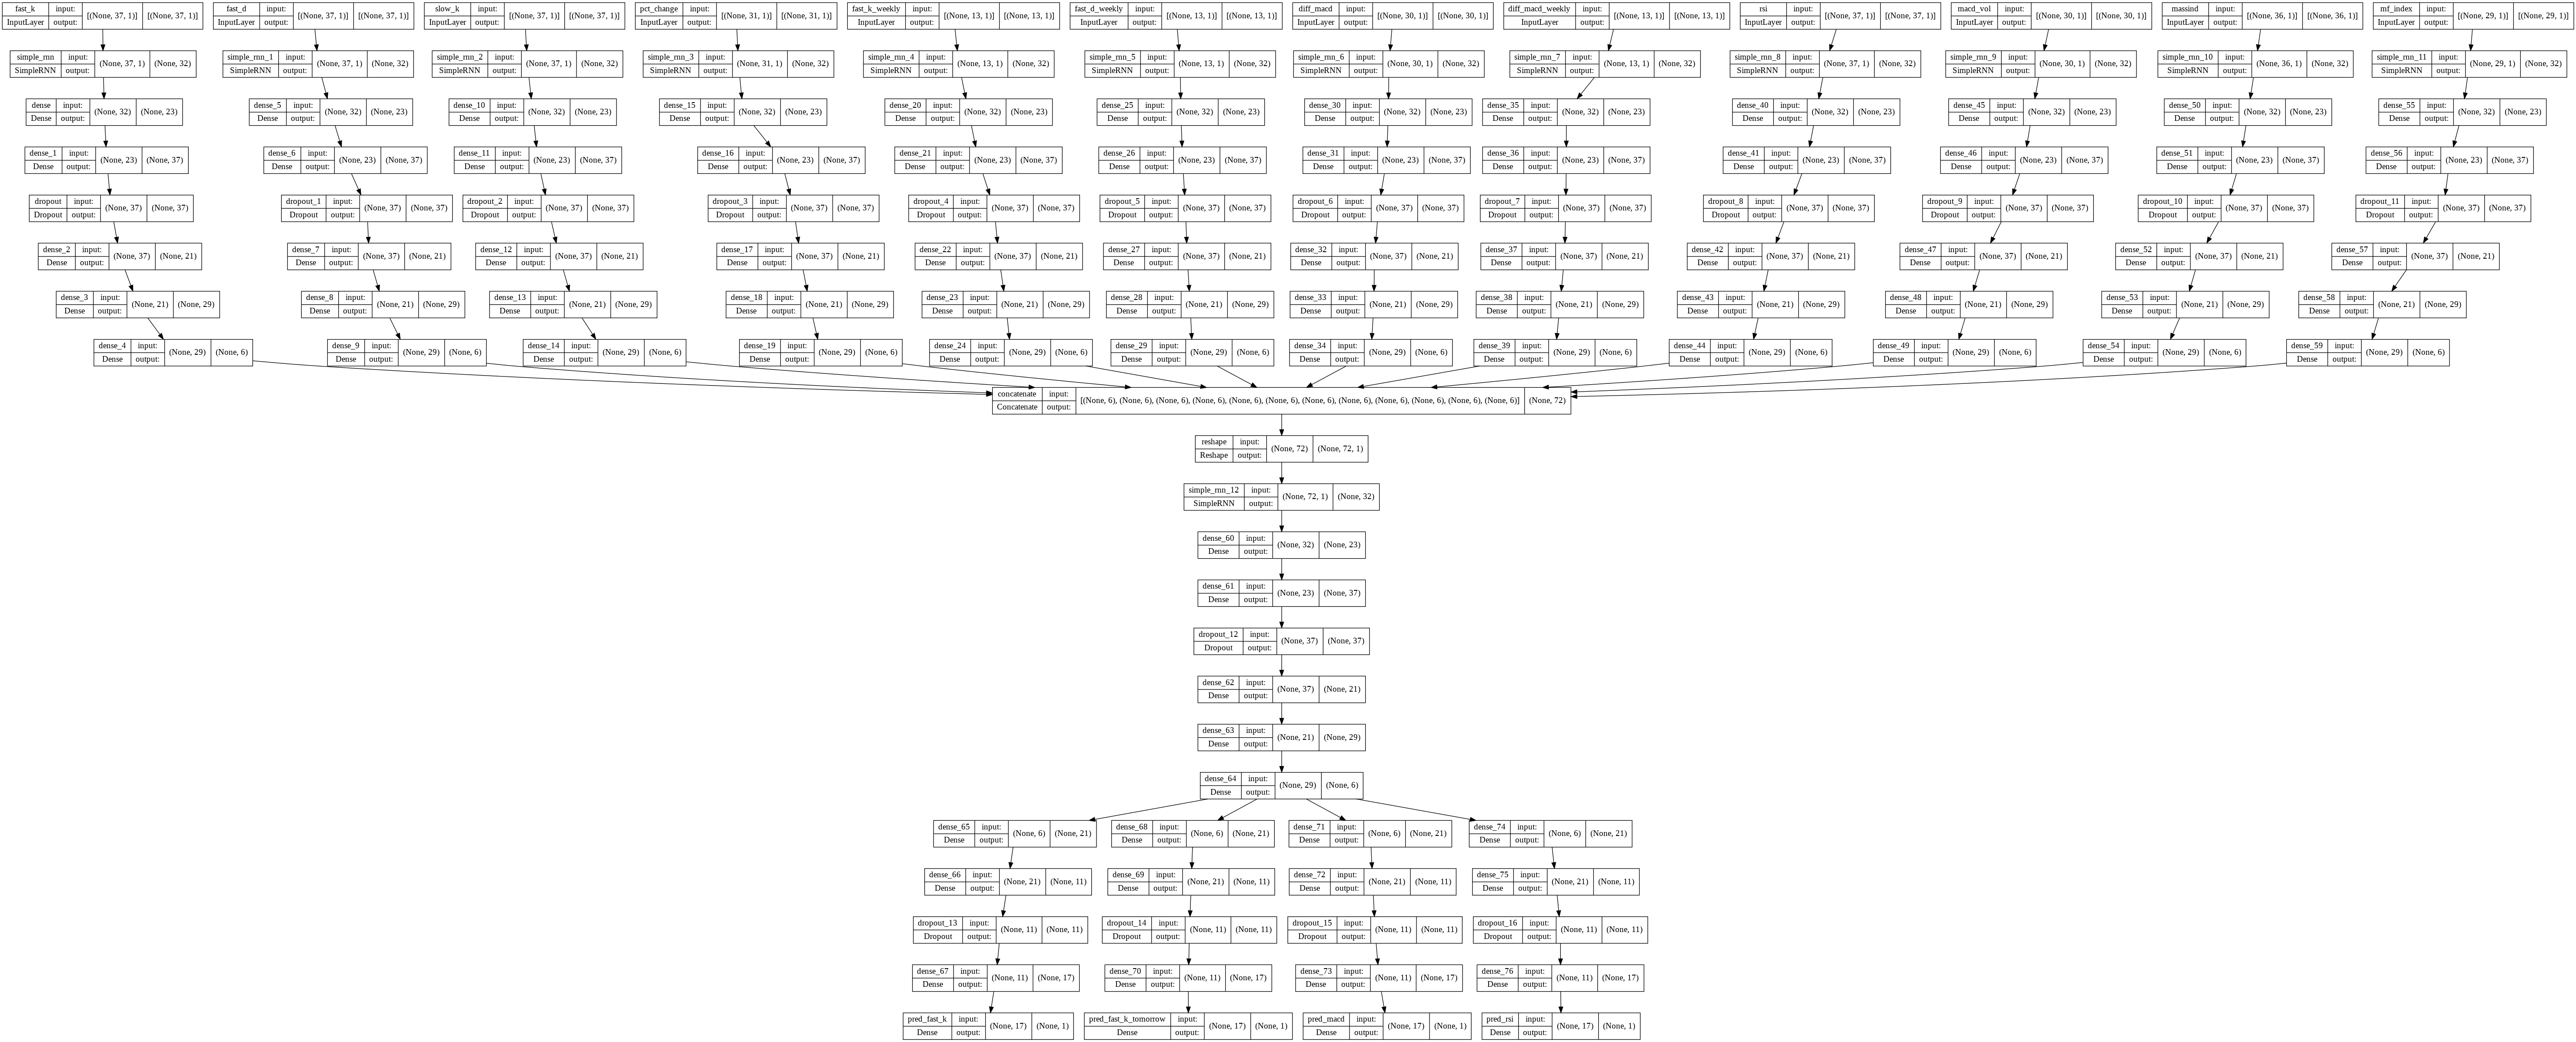

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png',
                          show_shapes=True,
                          # show_layer_activations=True
                          )

# Compile

In [ ]:
eps = 600
lr = 1e-2

In [ ]:
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=lr))

# Fit

In [ ]:
history = model.fit({'fast_k':input_fast_k_train, 'fast_d':input_fast_d_train,
                     'slow_k':input_slow_k_train, 'pct_change':input_pct_change_train,
                     'fast_k_weekly':input_fast_k_weekly_train, 
                     'fast_d_weekly':input_fast_d_weekly_train,
                     'diff_macd':input_diff_macd_train,
                     'diff_macd_weekly':input_diff_macd_weekly_train,
                     'rsi':input_rsi_train, 'macd_vol':input_macd_vol_train,
                     'massind':input_massind_train, 'mf_index':input_mf_index_train,
                    #  'ulcer_index':input_ulcer_index_train, 
                     }, 
                    {'pred_fast_k':output_fast_k_train,
                     'pred_fast_k_tomorrow':output_fast_k_tomorrow_train,
                     'pred_macd':output_macd_train,
                     'pred_rsi':output_rsi_train},
                    validation_split=.1,
                    epochs=eps
                    )

Epoch 1/600
25/25 [==============================] - 16s 160ms/step - loss: 2.0654 - pred_fast_k_loss: 0.6738 - pred_fast_k_tomorrow_loss: 0.6479 - pred_macd_loss: 0.1812 - pred_rsi_loss: 0.5624 - val_loss: 2.0666 - val_pred_fast_k_loss: 0.6597 - val_pred_fast_k_tomorrow_loss: 0.6436 - val_pred_macd_loss: 0.2105 - val_pred_rsi_loss: 0.5528
Epoch 2/600
25/25 [==============================] - 2s 62ms/step - loss: 2.0350 - pred_fast_k_loss: 0.6679 - pred_fast_k_tomorrow_loss: 0.6476 - pred_macd_loss: 0.1739 - pred_rsi_loss: 0.5455 - val_loss: 2.0307 - val_pred_fast_k_loss: 0.6527 - val_pred_fast_k_tomorrow_loss: 0.6378 - val_pred_macd_loss: 0.2089 - val_pred_rsi_loss: 0.5313
Epoch 3/600
25/25 [==============================] - 2s 63ms/step - loss: 2.0008 - pred_fast_k_loss: 0.6667 - pred_fast_k_tomorrow_loss: 0.6370 - pred_macd_loss: 0.1775 - pred_rsi_loss: 0.5196 - val_loss: 1.9881 - val_pred_fast_k_loss: 0.6459 - val_pred_fast_k_tomorrow_loss: 0.6309 - val_pred_macd_loss: 0.2081 - val_

In [ ]:
score = model.evaluate({'fast_k':input_fast_k_test, 'fast_d':input_fast_d_test,
                     'slow_k':input_slow_k_test, 'pct_change':input_pct_change_test,
                     'fast_k_weekly':input_fast_k_weekly_test, 
                     'fast_d_weekly':input_fast_d_weekly_test,
                     'diff_macd':input_diff_macd_test,
                     'diff_macd_weekly':input_diff_macd_weekly_test,
                     'rsi':input_rsi_test, 'macd_vol':input_macd_vol_test,
                     'massind':input_massind_test, 'mf_index':input_mf_index_test 
                     }, 
                    {'pred_fast_k':output_fast_k_test,
                     'pred_fast_k_tomorrow':output_fast_k_tomorrow_test,
                     'pred_macd':output_macd_test,
                     'pred_rsi':output_rsi_test}
                    )

9/9 [==============================] - 0s 18ms/step - loss: nan - pred_fast_k_loss: 0.1608 - pred_fast_k_tomorrow_loss: nan - pred_macd_loss: 0.1185 - pred_rsi_loss: 0.0800 


In [ ]:
score[1]

0.16080759465694427

In [ ]:
model.save(f'/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/05. Deep Learning/04. stockmarket_timehyperfeature/timeseriesmodelmae{np.round(score[1],3)}_tomorrow{np.round(score[2],3)}_eps{eps}')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/05. Deep Learning/04. stockmarket_timehyperfeature/timeseriesmodelmae0.161_tomorrownan_eps600/assets


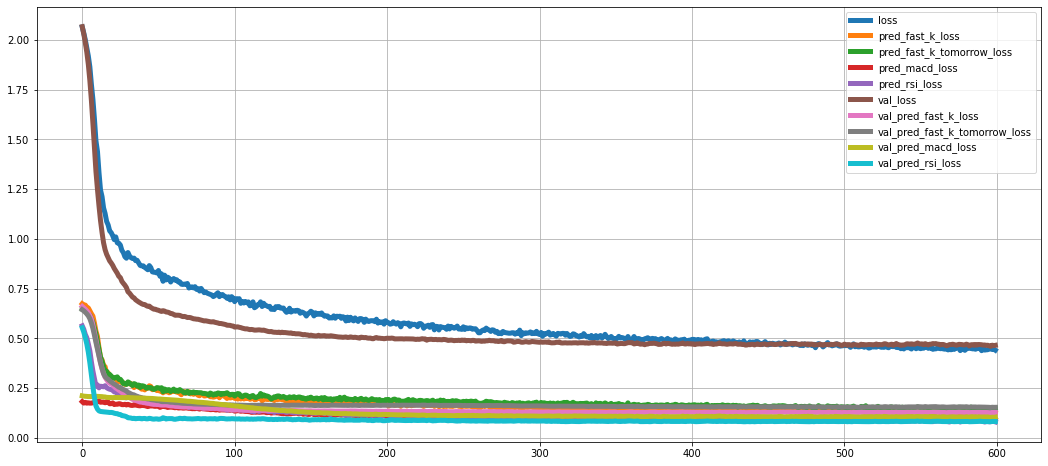

In [ ]:
pd.DataFrame(history.history).plot(figsize=(18,8), lw=5, grid=True)

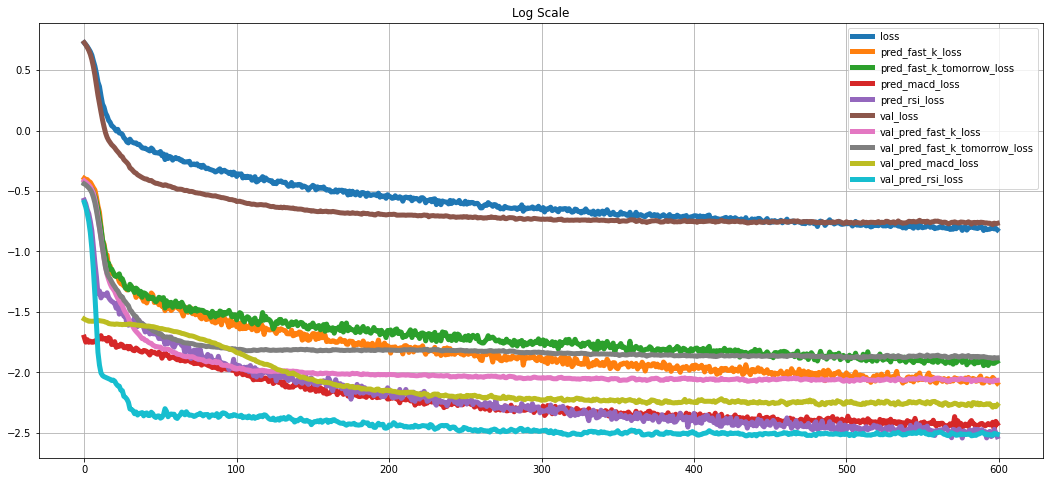

In [ ]:
np.log(pd.DataFrame(history.history)).plot(figsize=(18,8), lw=5, grid=True, title='Log Scale')

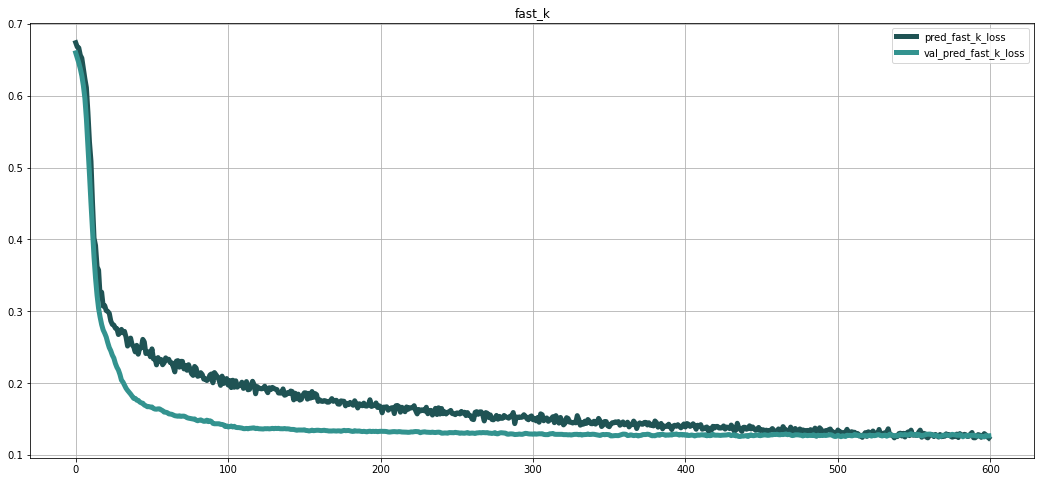

In [ ]:
ax = pd.DataFrame(history.history['pred_fast_k_loss']).plot(figsize=(18,8), lw=5, grid=True, title='fast_k',
                                                            color='#1F5354',label='pred_fast_k_loss')

pd.DataFrame(history.history['val_pred_fast_k_loss']).plot(figsize=(18,8), lw=5, grid=True,
                                                           color='#33938F',title='fast_k',
                                                           label='val_pred_fast_k_loss', ax=ax, legend=True)
plt.legend(['pred_fast_k_loss', 'val_pred_fast_k_loss'])

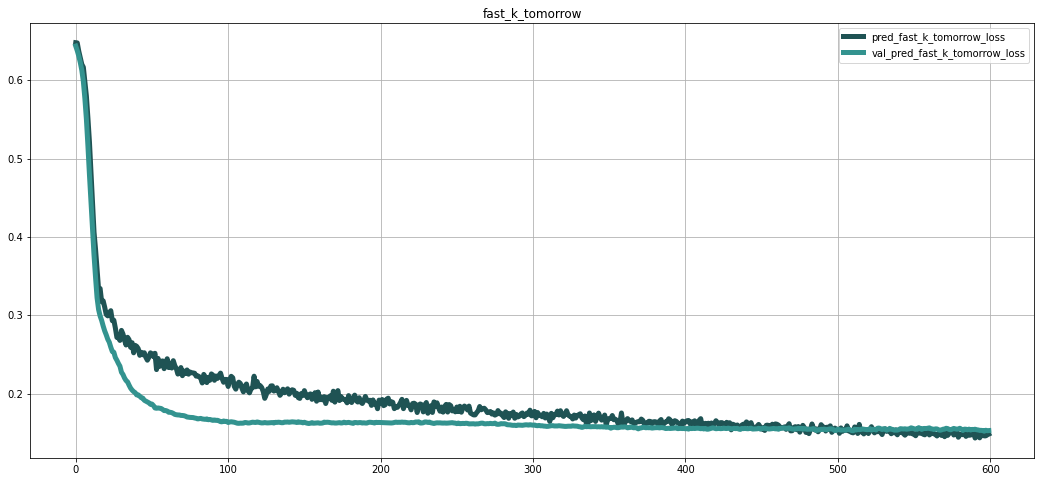

In [ ]:
ax = pd.DataFrame(history.history['pred_fast_k_tomorrow_loss']).plot(figsize=(18,8), lw=5, grid=True, title='fast_k_tomorrow',
                                                            color='#1F5354',label='pred_fast_k_tomorrow_loss')

pd.DataFrame(history.history['val_pred_fast_k_tomorrow_loss']).plot(figsize=(18,8), lw=5, grid=True,
                                                           color='#33938F',title='fast_k_tomorrow',
                                                           label='val_pred_fast_k_tomorrow_loss', ax=ax, legend=True)
plt.legend(['pred_fast_k_tomorrow_loss', 'val_pred_fast_k_tomorrow_loss'])

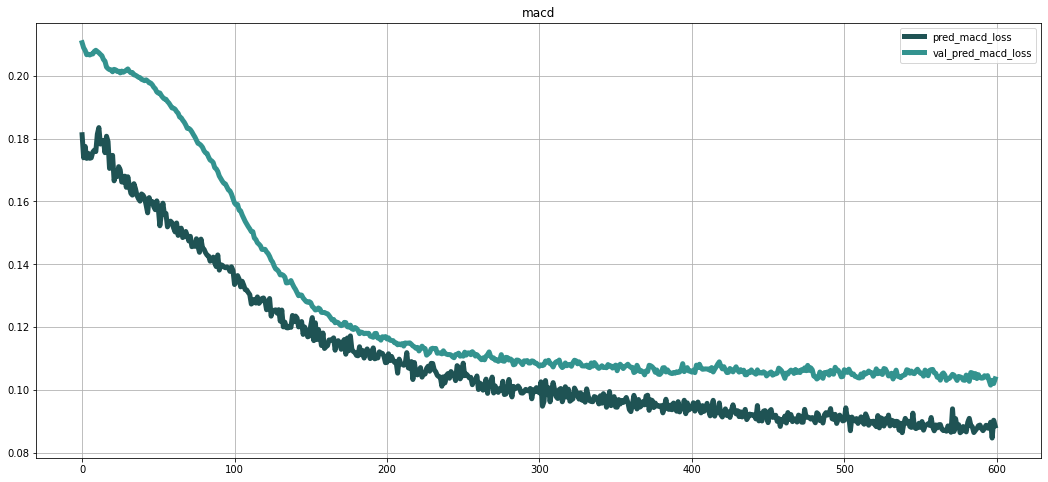

In [ ]:
ax = pd.DataFrame(history.history['pred_macd_loss']).plot(figsize=(18,8), lw=5, grid=True, title='macd',
                                                            color='#1F5354',label='pred_macd_loss')

pd.DataFrame(history.history['val_pred_macd_loss']).plot(figsize=(18,8), lw=5, grid=True,
                                                           color='#33938F',title='macd',
                                                           label='val_pred_macd_loss', ax=ax, legend=True)
plt.legend(['pred_macd_loss', 'val_pred_macd_loss'])

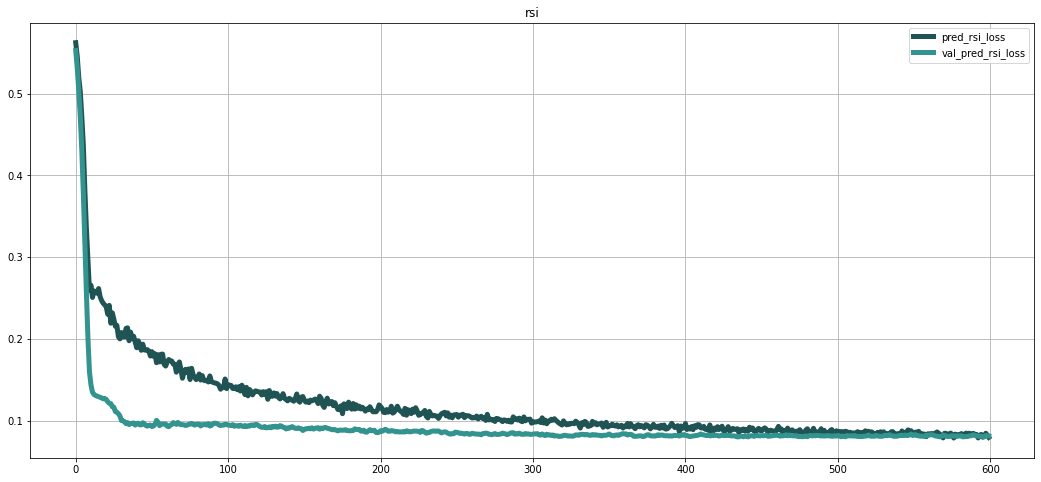

In [ ]:
ax = pd.DataFrame(history.history['pred_rsi_loss']).plot(figsize=(18,8), lw=5, grid=True, title='rsi',
                                                            color='#1F5354',label='pred_rsi_loss')

pd.DataFrame(history.history['val_pred_rsi_loss']).plot(figsize=(18,8), lw=5, grid=True,
                                                           color='#33938F',title='rsi',
                                                           label='val_pred_rsi_loss', ax=ax, legend=True)
plt.legend(['pred_rsi_loss', 'val_pred_rsi_loss'])

# Prediction Error Analysis